Enlaces a las paginas con datos:
- PIB Murcia y Espana - https://www.airef.es/es/datalab/estimacion-pib-trimestral-por-ccaa/
- IPI Murcia y Espana - https://ine.es/jaxiT3/Datos.htm?t=60272
- IPC y IPC subyacente Murcia y Espana - https://www.ine.es/jaxiT3/Datos.htm?t=50913
- ICE Indecadores de Confianza Empresarial Murcia y Espana - https://www.ine.es/jaxiT3/Datos.htm?t=8027
- ICM Índice de cifra de negocios del comercio al por menor, excepto de vehículos de motor y motocicletas - INE
- Afiliados fin de Mes Murcia y Espana - https://w6.seg-social.es/PXWeb/pxweb/es/Afiliados%20en%20alta%20laboral/Afiliados%20en%20alta%20laboral__Afiliados%20Fin%20de%20mes/03fb.%20Por%20sexo,%20CC.AA%20y%20regimen%20(Ultimo%20dia).px/table/tableViewLayout1/
- Balance Electrico Murcia y Espana (Murcia solo hasta 05/2025) - https://www.ree.es/es/datos/balance/balance-electrico
- Paro registrado Murcia y Espana - https://portal.mineco.gob.es/es-es/economiayempresa/EconomiaInformesMacro/Paginas/bdsice.aspx
- Tasa de Paro, Ocupados, Activos Murcia y Espana - https://portal.mineco.gob.es/es-es/economiayempresa/EconomiaInformesMacro/Paginas/bdsice.aspx
- Coste laboral por hora efectiva Murcia y Espana - https://www.ine.es/jaxiT3/Datos.htm?t=6062
- Coste Salarial Total y Otros Costes Murcia y Espana - https://www.ine.es/jaxiT3/Datos.htm?t=6061
- Matriculaciones de Turismos Murcia y Espana - https://portal.mineco.gob.es/es-es/economiayempresa/EconomiaInformesMacro/Paginas/bdsice.aspx



In [26]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, ARIMA
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import locale
locale.setlocale(locale.LC_TIME, 'Spanish_Spain.1252')
import matplotlib.dates as mdates
from datetime import datetime
locator = mdates.MonthLocator(bymonth=(1,7))
formatter = mdates.ConciseDateFormatter(locator)
from plottable import Table
from plottable import ColumnDefinition
from matplotlib.backends.backend_pdf import PdfPages

pdf = PdfPages(r"C:\_Kasza\Studia\UPO\Coyuntura y prediccion\Projekt końcowy\INFORME_FINAL_MURCIA.pdf")

In [27]:
# Generamos funciones que vamos a usar en el notebook
def DFtest(datos):
    print('Results of Dickey-Fuller Test (H0= NO estac.):')
    dftest = adfuller(datos, autolag='AIC')
    print('Test Statistic', dftest[0])
    print('p-value', dftest[1])

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    print({'mape':mape,'corr':corr})

## 1. Resumen
Exponer de manera resumida y representar gráficamente las principales variables que definen la evolución de la economía de la región.
Explicar y justificar el momento del ciclo en el que se encuentra la economía regional y las previsiones sobre su evolución en el corto plazo.
Esta sección es muy importante y debe ser lo suficientemente atractiva para generar interés en el lector respecto al resto del informe.



### PIB Murcia

In [28]:
# Importamos los datos
PIB = pd.read_excel(r"C:\_Kasza\Studia\UPO\Coyuntura y prediccion\Projekt końcowy\_Datos Proyecto Final.xlsx", sheet_name="PIB")

# Cambiamos la columna 'periodo'
PIB['periodo'] = PIB['periodo'].astype(str).str[:4] + 'Q' + PIB['periodo'].astype(str).str[5]
PIB['periodo'] = pd.DatetimeIndex(PIB['periodo'])
PIB.set_index('periodo', inplace = True)

PIB.head()

,PIB_Esp,PIB_Mur,ss_t_Esp,ss_t_Mur,ss_a_Esp,ss_a_Mur
periodo,,,,,,
2000-01-01,80.938848,75.012791,NaN,NaN,NaN,NaN
2000-04-01,81.961926,75.758890,1.264013,0.994629,NaN,NaN
2000-07-01,82.797746,77.312394,1.019766,2.050591,NaN,NaN
2000-10-01,83.684063,78.474472,1.070460,1.503094,NaN,NaN
2001-01-01,84.533708,78.711836,1.015302,0.302472,4.441452,4.931219


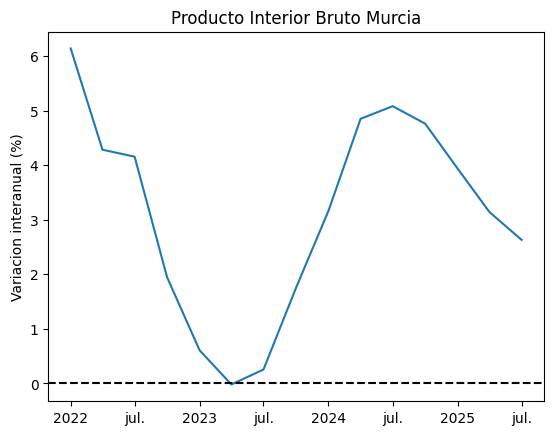

In [29]:
# Grafico de PIB de Murcia Tasa de variacion interanual
fig, ax = plt.subplots()
ax.plot(PIB['2022':].ss_a_Mur, c = '#1f77b4')
ax.axhline(y = 0, c = 'k', ls = '--')
ax.xaxis.set_major_locator(locator) 
ax.xaxis.set_major_formatter(formatter)  

plt.ylabel('Variacion interanual (%)')
plt.title('Producto Interior Bruto Murcia')
plt.show()

### IPC Murcia

In [30]:
# Importamos los datos
IPC = pd.read_excel(r"C:\_Kasza\Studia\UPO\Coyuntura y prediccion\Projekt końcowy\_Datos Proyecto Final.xlsx", sheet_name='IPC')

# Cambiamos la columna 'periodo'
IPC['periodo'] = pd.to_datetime(IPC['periodo'].str.replace('M', ''), format='%Y%m')
IPC = IPC.set_index('periodo').sort_index()
IPC = IPC.copy() 
IPC.tail()

,IPC_Esp,IPC_Mur,IPC_Esp_ss_a,IPC_Mur_ss_a,IPC_s_Esp,IPC_s_Mur,IPC_s_Esp_ss_a,IPC_s_Mur_ss_a
periodo,,,,,,,,
2025-07-01,118.777,118.491,2.7,2.0,117.753,117.632,2.3,1.8
2025-08-01,118.824,118.498,2.7,2.1,118.122,117.941,2.4,1.8
2025-09-01,118.485,118.091,3.0,2.4,117.748,117.618,2.4,1.9
2025-10-01,119.301,118.663,3.1,2.2,118.333,117.799,2.5,1.6
2025-11-01,119.532,119.321,3.0,2.5,118.503,118.605,2.6,2.1


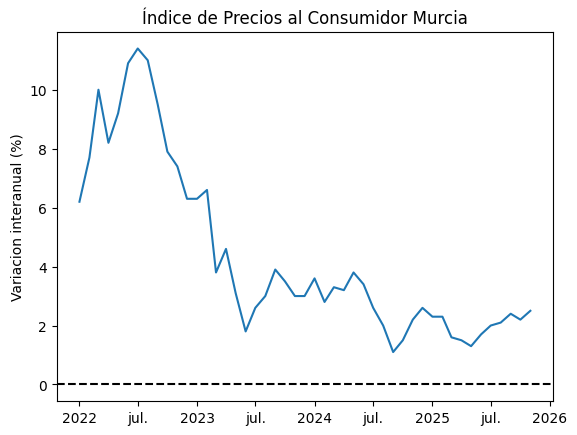

In [31]:
# Grafico de IPC de Murcia tasa de variacion interanual 
fig, ax = plt.subplots()
ax.plot(IPC['IPC_Mur_ss_a']['2022':], c = '#1f77b4')
ax.axhline(y = 0, c = 'k', ls = '--')
ax.xaxis.set_major_locator(locator)  
ax.xaxis.set_major_formatter(formatter)  

plt.ylabel('Variacion interanual (%)')
plt.title('Índice de Precios al Consumidor Murcia')
plt.show()

In [32]:
IPC['IPC_Mur_ss_a']['2022':].tail()

periodo
2025-07-01    2.0
2025-08-01    2.1
2025-09-01    2.4
2025-10-01    2.2
2025-11-01    2.5
Name: IPC_Mur_ss_a, dtype: float64

### Pagina 1

In [33]:
# Parametros del grafico
gridsize = (100,100)
fig_size = (8.27,11.69)
fig = plt.figure(figsize=fig_size, dpi=100)

# Bandera
bandera_path = r"C:\_Kasza\Studia\UPO\Coyuntura y prediccion\Projekt końcowy\Bandera_de_Murcia.jpg"
bandera = plt.imread(bandera_path)
flag_ax = fig.add_axes([0.83, 0.80, 0.12, 0.08])
flag_ax.imshow(bandera)
flag_ax.axis("off")

# TITULO Y DESCRIPCION
header_ax = plt.subplot2grid(gridsize, (0,0), colspan=100, rowspan=35)
header_ax.axis('off')

# Titulo Principal
header_ax.text(0.0, 0.95,
               'Informe de Coyuntura de la Región de\nMurcia 4º Trimestre de 2025',
               fontsize=18, fontweight='bold', va='top')

# Elaborado por
header_ax.text(0.0, 0.75,
               'Elaborado por:\nŁukasz Kasza',
               fontsize=10, va='top')

# Introduccion 
header_ax.text(
    0.0, 0.60,  
    "La economía murciana llega al final de 2025 en una fase de moderación del crecimiento, tras varios trimestres de fuerte expansión:",
    fontsize=12,
    va='top',
    wrap=True
)

# Bullets
bullet_y = 0.40
line_space = 0.14

bullets = [
    (
    'El PIB de Murcia crece un 2,64% interanual en el 3T de 2025, '
    'lo que\nsitúa a Murcia en una fase de desaceleración.'
    ),
    (
    'La inflación general en Murcia ronda el 2,5% interanual, muy por debajo '
    'de los máximos de 2022, lo que indica una normalización de las presiones de precios.'
    ),
    (
    'El mercado laboral de Murcia registra en el 3T de 2025 una tasa de paro cercana al 12,9% '
    'y una tasa de empleo en torno al 52,9%, con mejora respecto al año anterior.'
    ),
    (
    'A corto plazo se anticipa un crecimiento del PIB del 2,6% para el 4T de 2025 y una tasa '
    'de paro cercana al 11,7%, según las previsiones obtenidas con el modelo SARIMAX.'
    )
]

for txt in bullets:
    header_ax.text(
        0.0, bullet_y,
        u'\u2022 ' + txt,
        fontsize=12,
        va='top',
        wrap=True
    )
    bullet_y -= line_space

# ===== Graficos =====
# PIB
ax1 = plt.subplot2grid(gridsize,(55,5),colspan=45,rowspan=30)
ax1.plot(PIB['2022':].ss_a_Mur, c='#1f77b4')
ax1.axhline(y=0, c='k', ls='--')
ax1.set_ylabel('Variación interanual (%)')
ax1.set_title('Producto Interior Bruto de Murcia')
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

# IPC
ax2 = plt.subplot2grid(gridsize,(55,60),colspan=45,rowspan=30, sharey=ax1)
ax2.plot(IPC['IPC_Mur_ss_a']['2022':], c='#1f77b4')
ax2.axhline(y=0, c='k', ls='--')
ax2.set_ylabel('Variación interanual (%)')
ax2.set_title('Evolución del IPC de Murcia')
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(formatter)

# pos2 = ax2.get_position()
# ax2.set_position([pos2.x0 + 0.05, pos2.y0, pos2.width, pos2.height])

for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['left'].set_linewidth(1)

# Fuentes
fig.text(0.16, 0.20,
         'PIB trimestral. Fuente: AIReF. \n'
         'Unidades: variación interanual (%).\n'
         'Elaboración propia.',
         ha='left', va='top', fontsize=8)

fig.text(0.60, 0.20,
         'IPC general. Fuente: INE. \n'
         'Unidades: variación interanual (%).\n'
         'Elaboración propia.',
         ha='left', va='top', fontsize=8)

# Nota
fig.text(
    0.12, 0.525,
    'En este informe, la Región de Murcia se citará como Murcia (denominación abreviada).\n',
    fontsize=12, va='top'
)

pdf.savefig(fig, bbox_inches="tight", pad_inches=0.05)
plt.close(fig) 
plt.show()

## 2. Actividad productiva: (1 página)

PIB.  
Índice de Producción Industrial. - IPI  
Índice de confianza empresarial.  
Otros indicadores que estén disponibles y estiméis oportuno


### PIB Murcia y España

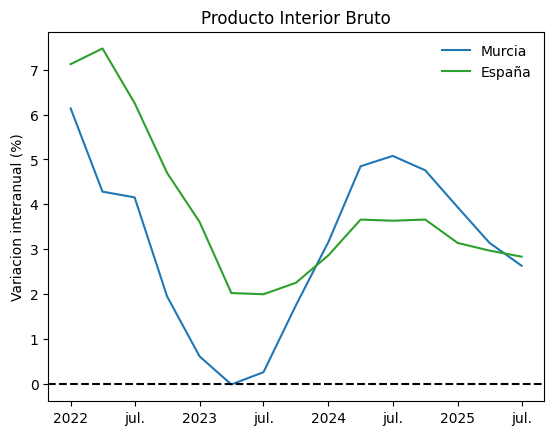

In [34]:
# Grafico de PIB de Murcia y España tasa de variacion interanual
fig, ax = plt.subplots()
ax.plot(PIB['2022':].ss_a_Mur, c = '#1f77b4', label = 'Murcia')
ax.plot(PIB['2022':].ss_a_Esp, c = '#2ca02c', label = 'España')
ax.axhline(y = 0, c = 'k', ls = '--')
ax.xaxis.set_major_locator(locator) 
ax.xaxis.set_major_formatter(formatter)  
ax.legend(frameon=False)

plt.ylabel('Variacion interanual (%)')
plt.title('Producto Interior Bruto')
plt.show()

### IPI Murcia y España

In [35]:
# Importamos los datos
IPI = pd.read_excel(r"C:\_Kasza\Studia\UPO\Coyuntura y prediccion\Projekt końcowy\_Datos Proyecto Final.xlsx", sheet_name="IPI")

# Cambiamos la columna 'periodo'
IPI['periodo'] = pd.to_datetime(IPI['periodo'].str.replace('M', ''), format='%Y%m')
IPI = IPI.set_index('periodo').sort_index()

# Datos a partir del ano 2003 (sin nan values)
IPI = IPI['2003':].copy()
IPI[['IPI_Mur','IPI_Mur_ss_a']] = IPI[['IPI_Mur','IPI_Mur_ss_a']].astype(float)
IPI.head(20)

,IPI_Esp,IPI_Mur,IPI_Esp_ss_a,IPI_Mur_ss_a
periodo,,,,
2003-01-01,118.698,96.010,-0.2,-0.6
2003-02-01,119.313,95.059,2.0,-3.8
2003-03-01,125.962,98.386,9.8,3.0
2003-04-01,118.698,94.109,-4.6,-11.4
2003-05-01,124.731,106.823,-1.4,7.8
2003-06-01,125.224,106.110,4.3,0.7
2003-07-01,132.365,122.983,2.0,-4.5
2003-08-01,82.867,92.445,-1.6,1.3
2003-09-01,124.362,107.892,2.2,4.5


Text(0.5, 1.0, 'Indice de Produccion Industrial')

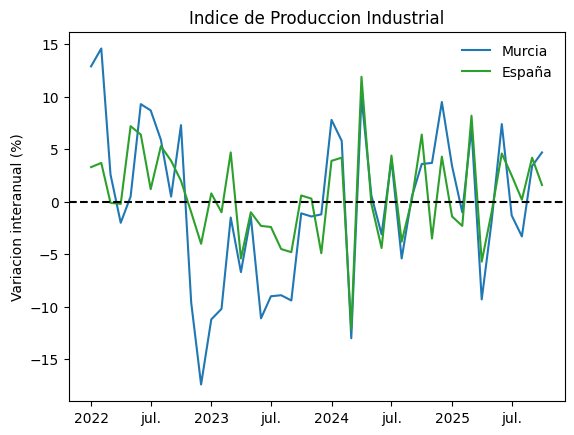

In [36]:
# Grafico de IPI de Murcia y España tasa de variacion interanual
fig, ax = plt.subplots()
ax.plot(IPI['2022':].IPI_Mur_ss_a, c = '#1f77b4', label = 'Murcia')
ax.plot(IPI['2022':].IPI_Esp_ss_a, c = '#2ca02c', label = 'España')
ax.axhline(y = 0, c = 'k', ls = '--')
ax.xaxis.set_major_locator(locator) 
ax.xaxis.set_major_formatter(formatter)  
ax.legend(frameon=False)
plt.ylabel('Variacion interanual (%)')
plt.title('Indice de Produccion Industrial')

### Indice de Confianza Empresarial Murcia y España

In [37]:
# Importamos los datos
ICE = pd.read_excel(r"C:\_Kasza\Studia\UPO\Coyuntura y prediccion\Projekt końcowy\_Datos Proyecto Final.xlsx", sheet_name="ICE")
ICE['periodo'] = ICE['periodo'].astype(str).str[:4] + 'Q' + ICE['periodo'].astype(str).str[5]
ICE['periodo'] = pd.DatetimeIndex(ICE['periodo'])
ICE.set_index('periodo', inplace = True)

# Elegimos el ano 2022 como una base
base_mur = ICE.loc['2022-01-01', 'ICE_Mur']
base_esp = ICE.loc['2022-01-01', 'ICE_Esp']

# Indice con base = 2022
ICE['ICE_Mur_22'] = ICE['ICE_Mur'] / base_mur * 100
ICE['ICE_Esp_22'] = ICE['ICE_Esp'] / base_esp * 100
ICE = ICE['2022':].copy()
ICE.tail()

,ICE_Esp,ICE_Mur,ICE_Mur_22,ICE_Esp_22
periodo,,,,
2024-10-01,136.3,129.8,108.984047,107.322835
2025-01-01,137.0,131.9,110.747271,107.874016
2025-04-01,137.1,128.3,107.724601,107.952756
2025-07-01,138.6,130.3,109.403862,109.133858
2025-10-01,136.8,130.8,109.823678,107.716535


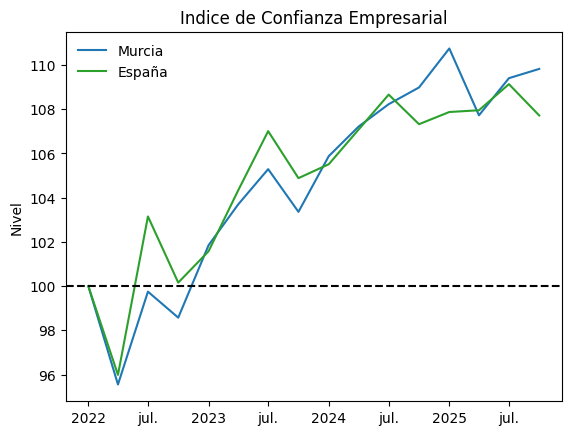

In [38]:
# Grafico de ICE de Murcia y España tasa de variacion interanual
fig, ax = plt.subplots()
ax.plot(ICE['ICE_Mur_22'], c = '#1f77b4', label = 'Murcia')
ax.plot(ICE['ICE_Esp_22'], c = '#2ca02c', label = 'España')
ax.axhline(y = 100, c = 'k', ls = '--')
ax.xaxis.set_major_locator(locator) 
ax.xaxis.set_major_formatter(formatter)  
ax.legend(frameon=False)
plt.ylabel('Nivel')
plt.title('Indice de Confianza Empresarial')
plt.show()

### Pagina 2

In [39]:
# Parametros de la figura
gridsize = (100,100)
fig_size = (8.27,11.69)
fig = plt.figure(figsize=fig_size, dpi=100)

# Parametros del titulo
header_ax = plt.subplot2grid(gridsize, (0,0), colspan=100, rowspan=25)
header_ax.axis('off')

# El titulo Principal
header_ax.text(0.0, 0.90,
               'Actividad productiva:',
               fontsize=18, fontweight='bold', va='top')

# ===== Graficos =====
# PIB
ax1 = plt.subplot2grid(gridsize,(10,0),colspan=90,rowspan=20)
ax1.plot(PIB['2022':].ss_a_Mur, c = '#1f77b4', label = 'Murcia')
ax1.plot(PIB['2022':].ss_a_Esp, c = '#2ca02c', label = 'España')
ax1.axhline(y = 0, c = 'k', ls = '--')
ax1.xaxis.set_major_locator(locator) 
ax1.xaxis.set_major_formatter(formatter)  
ax1.legend(frameon=False)
ax1.set_ylabel('Variacion interanual (%)')
ax1.set_title('Producto Interior Bruto')

# Descripcion PIB
fig.text(
    0.08, 0.57,
    'En el último trimestre disponible el PIB crece un 2,83% interanual en España y\n'
    'un 2,63% en la Región de Murcia, lo que sugiere una fase de enfriamiento del ciclo.',
    fontsize=11, va='top'
)

# IPI
ax2 = plt.subplot2grid(gridsize,(50,0),colspan=40,rowspan=25)
ax2.plot(IPI['2022':].IPI_Mur_ss_a, c = '#1f77b4', label = 'Murcia')
ax2.plot(IPI['2022':].IPI_Esp_ss_a, c = '#2ca02c', label = 'España')
ax2.axhline(y=0, c='k', ls='--')
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(formatter)
ax2.set_ylabel('Variacion interanual (%)')
ax2.set_title('Indice de Produccion Industrial')

# Descripcion IPI
fig.text(
    0.08, 0.24,
    'En los últimos meses el índice de producción industrial muestra una\n'
    'volatilidad similar a la de hace un año.',
    fontsize=11, va='top'
)

# ICE
ax3 = plt.subplot2grid(gridsize,(50,50),colspan=40,rowspan=25)
ax3.plot(ICE['ICE_Mur_22'], c = '#1f77b4', label = 'Murcia')
ax3.plot(ICE['ICE_Esp_22'], c = '#2ca02c', label = 'España')
ax3.axhline(y=100, c='k', ls='--')
ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(formatter)
ax3.set_ylabel('Nivel')
ax3.set_title('Indice de Confianza Empresarial')

pos3 = ax3.get_position()
ax3.set_position([pos3.x0 + 0.03, pos3.y0, pos3.width, pos3.height])

# Descripcion ICE
fig.text(
    0.08, 0.20,
    # El Indice de Confianza Empresarial en el último trimestre alcanza unos 110
    'El Indice de Confianza Empresarial en el último trimestre alcanza unos 110 \n'
    'puntos en Murcia y 109 en España, frente a niveles cercanos a 103 y 108 en 2022,\n'
    'lo que indica un mayor optimismo empresarial que el año pasado.',
    fontsize=11, va='top'
)

for ax in (ax1, ax2, ax3):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # opcjonalnie lekko pogrub dolną/lewą, żeby wyglądało „czyściej”
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['left'].set_linewidth(1)


# ===== Fuentes =====
fig.text(0.12, 0.62,
         'PIB trimestral. Unidades: variación interanual (%).\n'
         'Fuente: AIReF.\n'
         'Elaboración propia.',
         ha='left', va='top', fontsize=8)

fig.text(0.12, 0.28,
         'IPI general. Unidades: variación interanual (%).\n'
         'Fuente: INE. \n'
         'Elaboración propia.',
         ha='left', va='top', fontsize=8)

fig.text(0.54, 0.28,
         'ICE general. Unidades: Indice.\n'
         'Fuente: INE. \n'
         'Elaboración propia.',
         ha='left', va='top', fontsize=8)

pdf.savefig(fig, bbox_inches="tight", pad_inches=0.05)
plt.close(fig) 

plt.show()

## 3. Demanda: (1 página)
Índicador sintético de consumo en la comunidad autónoma, construido por vosotros. - ICM, REE  
Indicadores parciales más representativos (relevantes) del indicador sintético.  
Evolución del sector exterior (exportaciones, importaciones y balanza comercial).  

### Exportacion, Importacion y Balanza

#### Exportacion

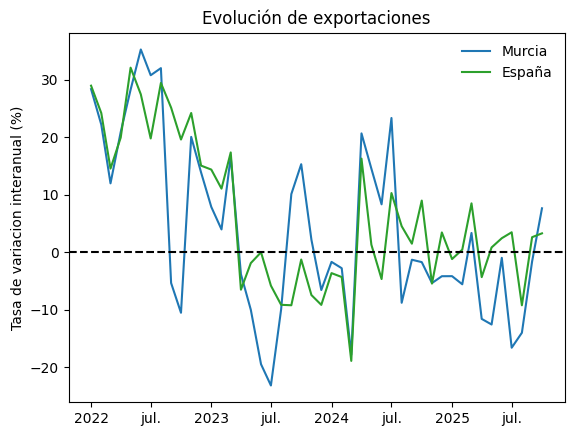

In [40]:
# Importamos datos
EX = pd.read_excel(r"C:\_Kasza\Studia\UPO\Coyuntura y prediccion\Projekt końcowy\_Datos Proyecto Final.xlsx", sheet_name='EX')
EX.head()

# Cambiamos 'periodo'
meses = {
    "enero": 1, "febrero": 2, "marzo": 3, "abril": 4,
    "mayo": 5, "junio": 6, "julio": 7, "agosto": 8,
    "septiembre": 9,
    "octubre": 10, "noviembre": 11, "diciembre": 12,
}

def parse_mes_esp(s):
    s = s.strip().lower()               
    mes_str, _, anio_str = s.partition(" de ")
    mes = meses[mes_str]
    anio = int(anio_str)
    return pd.Timestamp(year=anio, month=mes, day=1)

# Aplicamos parser y sorteamos index
EX["periodo"] = EX["periodo"].apply(parse_mes_esp)
EX = EX.set_index("periodo").sort_index()

# Tasas de variaciones interanuales
EX['ex_ss_Mur'] = EX['ex_Mur'].pct_change(12) * 100
EX['ex_ss_Esp'] = EX['ex_Esp'].pct_change(12) * 100

# Grafico de Tasa de Evolución de exportaciones
fig, ax = plt.subplots()
ax.plot(EX['ex_ss_Mur']['2022':], c = '#1f77b4', label = 'Murcia')
ax.plot(EX['ex_ss_Esp']['2022':], c = '#2ca02c', label = 'España')
ax.xaxis.set_major_locator(locator) 
ax.xaxis.set_major_formatter(formatter)  
ax.legend(frameon=False)
ax.axhline(y = 0, c = 'k', ls = '--')

plt.ylabel('Tasa de variacion interanual (%)')
plt.title('Evolución de exportaciones')
plt.show()

#### Importacion


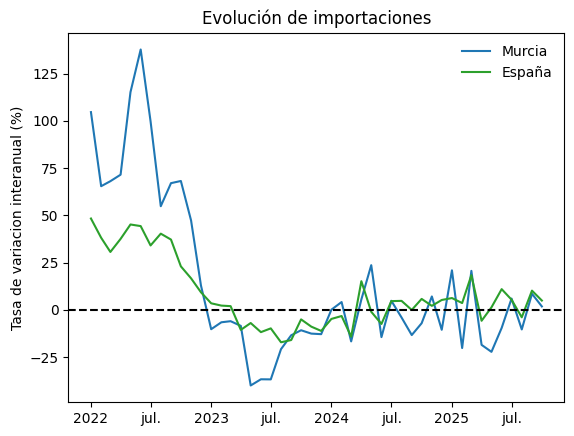

In [41]:
# Importamos datos
IM = pd.read_excel(r"C:\_Kasza\Studia\UPO\Coyuntura y prediccion\Projekt końcowy\_Datos Proyecto Final.xlsx", sheet_name='IM')

# Aplicamos parser y sorteamos index
IM["periodo"] = IM["periodo"].apply(parse_mes_esp)
IM = IM.set_index("periodo").sort_index()

# Tasas de variaciones interanuales
IM['im_ss_Mur'] = IM['im_Mur'].pct_change(12) * 100
IM['im_ss_Esp'] = IM['im_Esp'].pct_change(12) * 100

# Tasa de Evolución de importaciones
fig, ax = plt.subplots()
ax.plot(IM['im_ss_Mur']['2022':], c = '#1f77b4', label = 'Murcia')
ax.plot(IM['im_ss_Esp']['2022':], c = '#2ca02c', label = 'España')
ax.xaxis.set_major_locator(locator) 
ax.xaxis.set_major_formatter(formatter)  
ax.legend(frameon=False)
ax.axhline(y = 0, c = 'k', ls = '--')

plt.ylabel('Tasa de variacion interanual (%)')
plt.title('Evolución de importaciones')
plt.show()

#### Balanza

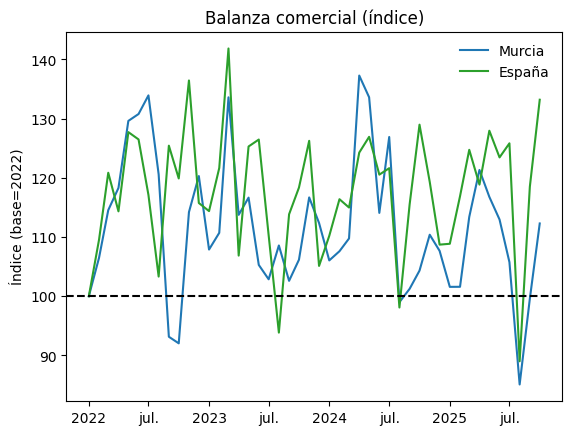

In [42]:
# Creamos dataframe BC i contamos Balanza comercial
BC = IM.merge(EX, how='inner', left_index=True, right_index=True)
BC['bal_Mur'] = BC['ex_Mur'] - BC['im_Mur']
BC['bal_Esp'] = BC['ex_Esp'] - BC['im_Esp']

# Creamos indice
BC_idx = BC[['bal_Mur','bal_Esp']].copy()
BC_idx['bal_Mur_idx'] = 100 * BC['bal_Mur'] / BC['bal_Mur']['2022-01-01']
BC_idx['bal_Esp_idx'] = 100 * BC['bal_Esp'] / BC['bal_Esp']['2022-01-01']
BC_idx.tail()

# Grafico de Balanza comercial (indice)
fig, ax = plt.subplots()
ax.plot(BC_idx['bal_Mur_idx']['2022':], c='#1f77b4', label='Murcia')
ax.plot(BC_idx['bal_Esp_idx']['2022':], c='#2ca02c', label='España')
ax.axhline(100, c='k', ls='--')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.legend(frameon=False)
plt.ylabel('Índice (base=2022)')
plt.title('Balanza comercial (índice)')
plt.show()

#### Graficos de IPI y ICM

Text(0.5, 1.0, 'Indice de Produccion Industrial')

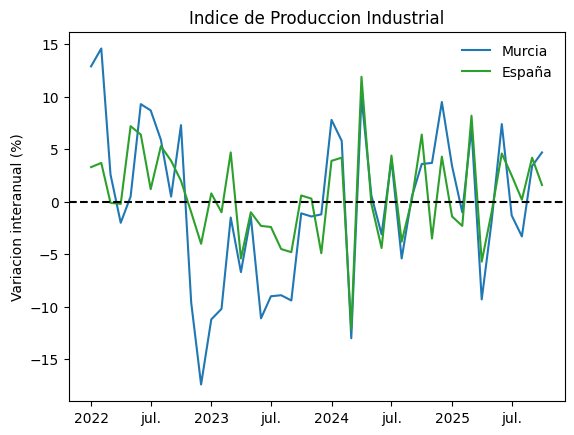

In [43]:
# Grafico de IPI tasa de variacion interanual
fig, ax = plt.subplots()
ax.plot(IPI['2022':].IPI_Mur_ss_a, c = '#1f77b4', label = 'Murcia')
ax.plot(IPI['2022':].IPI_Esp_ss_a, c = '#2ca02c', label = 'España')
ax.axhline(y = 0, c = 'k', ls = '--')
ax.xaxis.set_major_locator(locator) 
ax.xaxis.set_major_formatter(formatter)  
ax.legend(frameon=False)
plt.ylabel('Variacion interanual (%)')
plt.title('Indice de Produccion Industrial')

Text(0.5, 1.0, 'Índice de Comercio al por Menor')

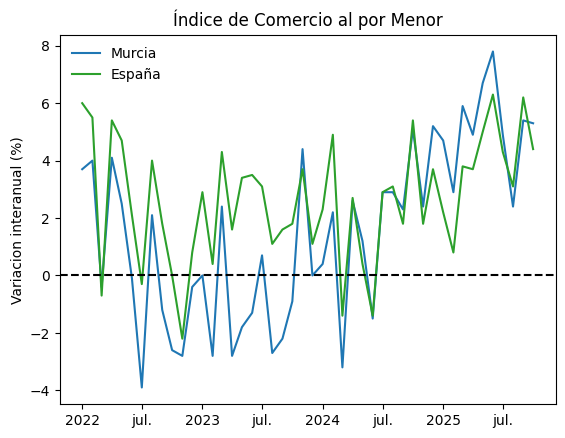

In [44]:
# Importamos datos
ICM = pd.read_excel(r"C:\_Kasza\Studia\UPO\Coyuntura y prediccion\Projekt końcowy\_Datos Proyecto Final.xlsx", sheet_name="ICM")

# Cambiamos la columna 'periodo'
ICM['periodo'] = pd.to_datetime(ICM['periodo'].str.replace('M', ''), format='%Y%m')
ICM = ICM.set_index('periodo').sort_index()
ICM = ICM['2005':].copy()

# Grafico de ICM tasa de variacion interanual
fig, ax = plt.subplots()
ax.plot(ICM['2022':].ICM_Mur_ss_a, c = '#1f77b4', label = 'Murcia')
ax.plot(ICM['2022':].ICM_Esp_ss_a, c = '#2ca02c', label = 'España')
ax.axhline(y = 0, c = 'k', ls = '--')
ax.xaxis.set_major_locator(locator) 
ax.xaxis.set_major_formatter(formatter)  
ax.legend(frameon=False)
plt.ylabel('Variacion interanual (%)')
plt.title('Índice de Comercio al por Menor')


### Pagina 3

In [45]:
# Parametros del grafico
gridsize = (100,100)
fig_size = (8.27,11.69)
fig = plt.figure(figsize=fig_size, dpi=100)

# Parametros del titulo
header_ax = plt.subplot2grid(gridsize, (0,0), colspan=100, rowspan=25)
header_ax.axis('off')

# EL titulo
header_ax.text(0.0, 0.90,
               'Demanda:',
               fontsize=18, fontweight='bold', va='top')


# Índice de Comercio al por Menor
ax1 = plt.subplot2grid(gridsize,(10,0),colspan=45,rowspan=15)
ax1.plot(ICM['2022':].ICM_Mur_ss_a, c = '#1f77b4', label = 'Murcia')
ax1.plot(ICM['2022':].ICM_Esp_ss_a, c = '#2ca02c', label = 'España')
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)
ax1.axhline(y = 0, c = 'k', ls = '--')
ax1.set_title('Índice de Comercio al por Menor')


# IPI
ax2 = plt.subplot2grid(gridsize,(10,50),colspan=45,rowspan=15)           
ax2.plot(IPI['2022':].IPI_Mur_ss_a, c='#1f77b4', label='Murcia')
ax2.plot(IPI['2022':].IPI_Esp_ss_a, c='#2ca02c', label='España')
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(formatter)
ax2.axhline(y = 0, c = 'k', ls = '--')
ax2.set_title('Indice de Produccion Industrial')

# Tasa de Evolución de importaciones
ax3 = plt.subplot2grid(gridsize,(32,0),colspan=45,rowspan=15)
ax3.plot(IM['im_ss_Mur']['2022':], c = '#1f77b4', label = 'Murcia')
ax3.plot(IM['im_ss_Esp']['2022':], c = '#2ca02c', label = 'España')
ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(formatter)
ax3.axhline(y = 0, c = 'k', ls = '--')
ax3.set_title('Evolución de importaciones')

# Tasa de Evolución de exportaciones
ax4 = plt.subplot2grid(gridsize,(32,50),colspan=45,rowspan=15)
ax4.plot(EX['ex_ss_Mur']['2022':], c = '#1f77b4', label = 'Murcia')
ax4.plot(EX['ex_ss_Esp']['2022':], c = '#2ca02c', label = 'España')
ax4.xaxis.set_major_locator(locator) 
ax4.xaxis.set_major_formatter(formatter) 
ax4.axhline(y = 0, c = 'k', ls = '--')
ax4.set_title('Evolución de exportaciones')

# Leyenda
fig.text(
    0.06, 0.67,                            
    'Tasa de variación interanual (%)',
    va='center', rotation='vertical', fontsize=10
)

# Descripcion de los indicadores parciales
fig.text(
    0.12, 0.45,
    'En el último periodo disponible, los indicadores parciales de demanda interna\n'
    'muestran que el consumo en Murcia mantiene un crecimiento moderado,\n'
    'con oscilaciones interanuales y un comportamiento similar al del conjunto\n'
    'de España. No obstante, en octubre la balanza comercial de España se sitúa\n'
    'claramente por encima de la de Murcia (133 frente a 112 puntos de índice).',
    fontsize=11, va='top'
)

# Balanza
ax5 = plt.subplot2grid(gridsize,(70,0),colspan=95,rowspan=30)
ax5.plot(BC_idx['bal_Mur_idx']['2022':], c = '#1f77b4', label = 'Murcia')
ax5.plot(BC_idx['bal_Esp_idx']['2022':], c = '#2ca02c', label = 'España')
ax5.xaxis.set_major_locator(locator) 
ax5.xaxis.set_major_formatter(formatter)  
ax5.legend(frameon=False)
ax5.axhline(y = 100, c = 'k', ls = '--')
ax5.set_ylabel('Índice (base=2022)')
ax5.set_title('Balanza comercial')

for ax in (ax1, ax2, ax3, ax4, ax5):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['left'].set_linewidth(1)


# ===== FUENTES =====
fig.text(
    0.12, 0.49,
    'Indicadores parciales de demanda interna.\n'
    'Unidades: tasa de variación interanual (%).\n'
    'Fuente: INE y Datacomex. Elaboración propia.',
    ha='left', va='top', fontsize=8
)


fig.text(
    0.12, 0.08,
    'Balanza comercial de bienes. Índice (base=2022).\n'
    'Fuente: Datacomex. Elaboración propia.',
    ha='left', va='top', fontsize=8
)

pdf.savefig(fig, bbox_inches="tight", pad_inches=0.05)
plt.close(fig) 

plt.show()

## 4. Mercado de trabajo: (1 página)

Tasas de actividad, empleo y paro (EPA).  
Evolución de la afiliación a la Seguridad Social.  
Evolución del paro registrado.  
Otros indicadores que estén disponibles y estiméis oportuno.  

### EPA - Tasa de Paro, Tasa de Actividad, Tasa de Empleo

In [46]:
# EPA Murcia
EPA_mur = pd.read_excel(r"C:\_Kasza\Studia\UPO\Coyuntura y prediccion\Projekt końcowy\_Datos Proyecto Final.xlsx", sheet_name="EPA_mur")
EPA_mur = EPA_mur[['periodo','TP_Mur','TE_Mur','TA_Mur']].copy()
EPA_mur['periodo'] = EPA_mur['periodo'].astype(str).str[2:] + 'Q' + EPA_mur['periodo'].astype(str).str[0]
EPA_mur['periodo'] = pd.DatetimeIndex(EPA_mur['periodo'])
EPA_mur.set_index('periodo', inplace = True)
EPA_mur = EPA_mur.sort_index()
EPA_mur = EPA_mur * 100

# EPA España
EPA_esp = pd.read_excel(r"C:\_Kasza\Studia\UPO\Coyuntura y prediccion\Projekt końcowy\_Datos Proyecto Final.xlsx", sheet_name='EPA_esp')
EPA_esp['periodo'] = EPA_esp['periodo'].astype(str).str[2:] + 'Q' + EPA_esp['periodo'].astype(str).str[0]
EPA_esp['periodo'] = pd.DatetimeIndex(EPA_esp['periodo'])
EPA_esp.set_index('periodo', inplace = True)
EPA_esp = EPA_esp.sort_index()

# Merge EPA Murcia y EPA España
EPA = EPA_esp.merge(EPA_mur, how='inner', left_index=True, right_index=True)
EPA[['TP_Mur','TP_Esp']].tail(1)

,TP_Mur,TP_Esp
periodo,,
2025-07-01,12.922465,10.45


Dodaj może jeszcze jakąś zmienną

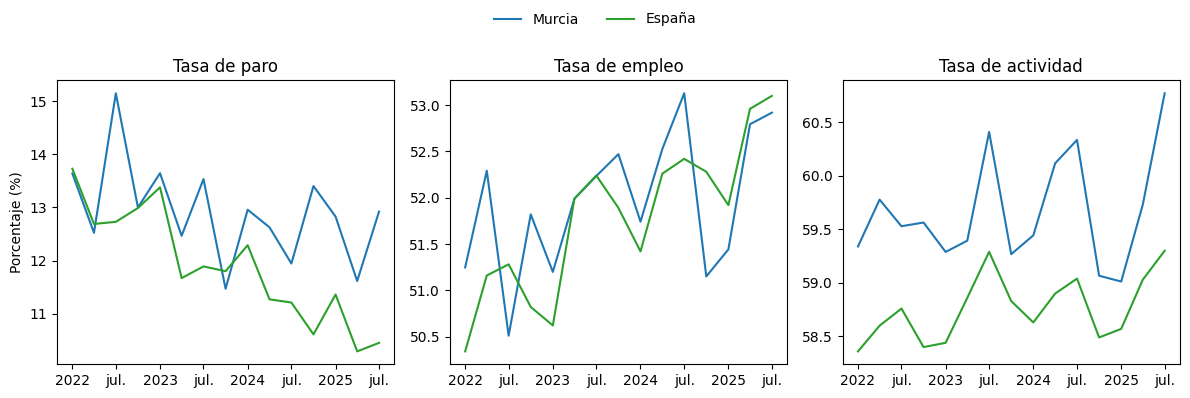

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=True)

# Tasa de paro
ax = axes[0]
ax.plot(EPA['2022':].TP_Mur, c='#1f77b4', label='Murcia')
ax.plot(EPA['2022':].TP_Esp, c='#2ca02c', label='España')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.set_ylabel('Porcentaje (%)')
ax.set_title('Tasa de paro')

# Tasa de empleo
ax = axes[1]
ax.plot(EPA['2022':].TE_Mur, c='#1f77b4', label='Murcia')
ax.plot(EPA['2022':].TE_Esp, c='#2ca02c', label='España')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.set_title('Tasa de empleo')

# Tasa de actividad
ax = axes[2]
ax.plot(EPA['2022':].TA_Mur, c='#1f77b4', label='Murcia')
ax.plot(EPA['2022':].TA_Esp, c='#2ca02c', label='España')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.set_title('Tasa de actividad')


handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, frameon=False)

plt.tight_layout(rect=(0, 0, 1, 0.9))
plt.show()

### Paro registrado

In [48]:
# Importamos Paro Registrado
PR = pd.read_excel(r"C:\_Kasza\Studia\UPO\Coyuntura y prediccion\Projekt końcowy\_Datos Proyecto Final.xlsx", sheet_name="PR")
PR['periodo'] = PR['periodo'].astype(str)
PR['periodo'] = PR['periodo'].str.split('/').str[1] + PR['periodo'].str.split('/').str[0]
PR['periodo'] = pd.to_datetime(PR['periodo'], format='%Y%m')
PR.set_index('periodo', inplace=True)
PR = PR.sort_index()

# Tasas de variacion interanual
PR['ti_PR_Mur'] = PR['PR_Mur'].pct_change(12) * 100
PR['ti_PR_Esp'] = PR['PR_Esp'].pct_change(12) * 100

# Periodo interesante para nosotros
PR = PR['2022':]
PR[['ti_PR_Mur','ti_PR_Esp']].tail(1)

,ti_PR_Mur,ti_PR_Esp
periodo,,
2025-11-01,-6.896552,-6.227992


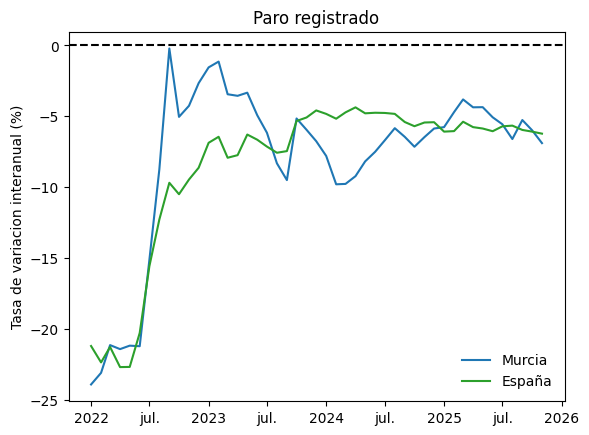

In [49]:
# Parados registrados diferencia interanual
fig, ax = plt.subplots()
ax.plot(PR['ti_PR_Mur'], c = '#1f77b4', label = 'Murcia')
ax.plot(PR['ti_PR_Esp'], c = '#2ca02c', label = 'España')
ax.axhline(y = 0, c = 'k', ls = '--')
ax.xaxis.set_major_locator(locator) 
ax.xaxis.set_major_formatter(formatter)  
ax.legend(frameon=False)

plt.ylabel('Tasa de variacion interanual (%)')
plt.title('Paro registrado')
plt.show()

### Afiliados 

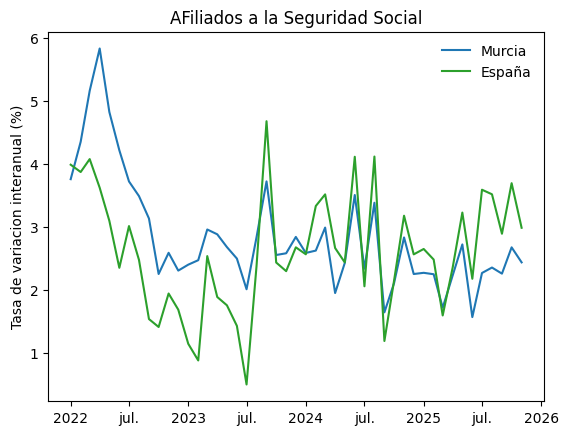

In [50]:
# Importamos Afiliados
AF = pd.read_excel(r"C:\_Kasza\Studia\UPO\Coyuntura y prediccion\Projekt końcowy\_Datos Proyecto Final.xlsx", sheet_name="AF")
AF['periodo'] = pd.to_datetime(AF['periodo'], format='%Y%m')
AF.set_index('periodo', inplace = True)
AF['ti_Esp'] = AF['Esp'].pct_change(12) * 100
AF['ti_Mur'] = AF['Mur'].pct_change(12) * 100
AF_is = AF[['Esp','Mur']]


# Tasa de afiliados interanual
fig, ax = plt.subplots()
ax.plot(AF['ti_Esp']['2022':], c = '#1f77b4', label = 'Murcia')
ax.plot(AF['ti_Mur']['2022':], c = '#2ca02c', label = 'España')
ax.xaxis.set_major_locator(locator) 
ax.xaxis.set_major_formatter(formatter)  
ax.legend(frameon=False)

plt.ylabel('Tasa de variacion interanual (%)')
plt.title('AFiliados a la Seguridad Social')
plt.show()

### Pagina 4

In [51]:
# Parametros del grafico
gridsize = (100,100)
fig_size = (8.27,11.69)
fig = plt.figure(figsize=fig_size, dpi=100)

# Parametros del titulo
header_ax = plt.subplot2grid(gridsize, (0,0), colspan=100, rowspan=25)
header_ax.axis('off')

# El titulo principal
header_ax.text(0.0, 0.90,
               'Mercado de trabajo:',
               fontsize=18, fontweight='bold', va='top')

# Tasa de actividad
ax1 = plt.subplot2grid(gridsize,(10,0),colspan=40,rowspan=30)
ax1.plot(EPA['2022':].TA_Mur, c = '#1f77b4', label = 'Murcia')
ax1.plot(EPA['2022':].TA_Esp, c = '#2ca02c', label = 'España')
ax1.xaxis.set_major_locator(locator) 
ax1.xaxis.set_major_formatter(formatter)  
ax1.legend(frameon=False)
ax1.set_ylabel('Porcentaje (%)')
ax1.set_title('Tasa de actividad')


# Tasa de empleo
ax2 = plt.subplot2grid(gridsize,(10,55),colspan=40,rowspan=30)
ax2.plot(EPA['2022':].TE_Mur, c = '#1f77b4', label = 'Murcia')
ax2.plot(EPA['2022':].TE_Esp, c = '#2ca02c', label = 'España')
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(formatter)
ax2.set_ylabel('Porcentaje (%)')
ax2.set_title('Tasa de empleo')

# Descripcion de Tasa de Actividad y Empleo
fig.text(
    0.12, 0.51,
    'En el último trimestre disponible, la tasa de actividad de Murcia se sitúa en torno\nal 60,8%'
    'y la tasa de empleo en el 52,9%, niveles muy próximos a los registrados\npara el conjunto de España.',
    fontsize=11, va='top'
)

# Paro registrado y tasa de paro
ax3 = plt.subplot2grid(gridsize,(57,0),colspan=95,rowspan=30)
ax3.plot(PR['ti_PR_Mur'], c = '#1f77b4', label = 'Murcia')
ax3.plot(PR['ti_PR_Esp'], c = '#2ca02c', label = 'España')
ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(formatter)
ax3.axhline(y = 0, c = 'k', ls = '--')
ax3.set_ylabel('Tasa de variación interanual (%)')
ax3.set_title('Paro registrado')

ax4 = inset_axes(ax3, width="40%", height="40%",  
                 loc="lower right",  bbox_to_anchor=(0, 0.08, 1, 1), bbox_transform=ax3.transAxes)               

ax4.plot(EPA['2022':].TP_Mur, c='#1f77b4', label='Murcia')
ax4.plot(EPA['2022':].TP_Esp, c='#2ca02c', label='España')
ax4.xaxis.set_major_locator(locator)
ax4.xaxis.set_major_formatter(formatter)
ax4.set_ylabel('Porcentaje (%)', fontsize=8)
ax4.set_title('Tasa de paro', fontsize=9)

# Descripcion del Paro Registrado y Tasa de PAro
fig.text(
    0.12, 0.14,
    'En el 3 trimestre de 2025, la tasa de paro en Murcia se sitúa en torno al 12,9%,\nclaramente por encima '
    'del 10,5% de España, mientras que el paro registrado\nsigue cayendo aritmos interanuales próximos al -7% en ambas economías.',
    fontsize=11, va='top'
)

for ax in (ax1, ax2, ax3, ax4):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['left'].set_linewidth(1)

# ===== Fuentes =====
fig.text(0.12, 0.547,
         'Tasa de actividad. Unidades en tasas.\n'
         'Fuente: INE.\n'
         'Elaboración propia.',
         ha='left', va='top', fontsize=8)


fig.text(0.547, 0.547,
         'Tasa de empleo. Unidades en tasas.\n'
         'Fuente: INE.\n'
         'Elaboración propia.',
         ha='left', va='top', fontsize=8)

fig.text(0.12, 0.185,
         'Paro registrado y tasa de paro.\n'
         'Unidades: variación interanual (%) y tasas.\n'
         'Fuente: INE. Elaboración propia.',
         ha='left', va='top', fontsize=8)

pdf.savefig(fig, bbox_inches="tight", pad_inches=0.05)
plt.close(fig) 
# plt.show()

## 5. Precios y costes: (media página)

Inflación (IPC). Total y subyacente (es decir, sin energía ni alimentos no elaborados).  
Costes laborales. Salariales y no salariales.  

### IPC y IPC subyacente

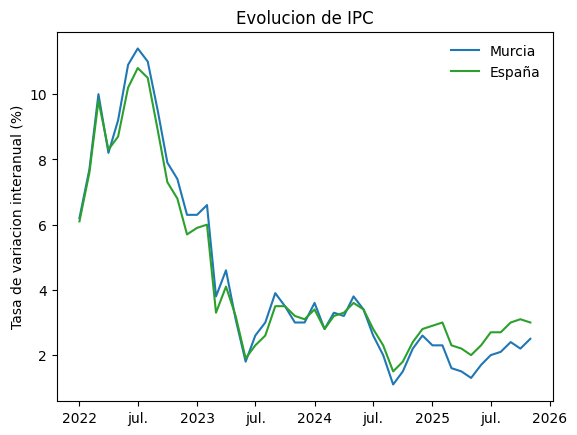

In [52]:
# Grafico del IPC tasa de variacion interanual
fig, ax = plt.subplots()
ax.plot(IPC['IPC_Mur_ss_a']['2022':], c = '#1f77b4', label = 'Murcia')
ax.plot(IPC['IPC_Esp_ss_a']['2022':], c = '#2ca02c', label = 'España')
ax.xaxis.set_major_locator(locator) 
ax.xaxis.set_major_formatter(formatter)  
ax.legend(frameon=False)

plt.ylabel('Tasa de variacion interanual (%)')
plt.title('Evolucion de IPC')
plt.show()

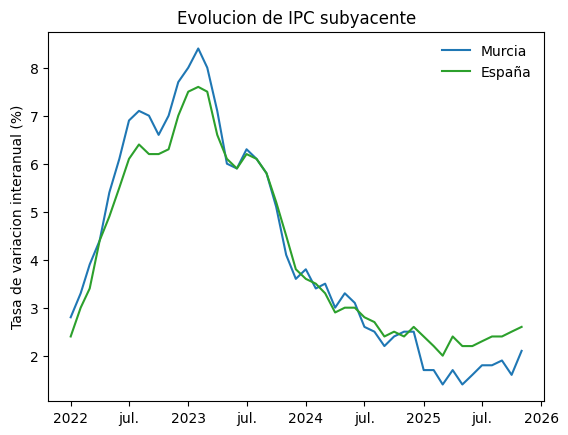

In [53]:
# Grafico del IPC subyacente tasa de variacion interanual
fig, ax = plt.subplots()
ax.plot(IPC['IPC_s_Mur_ss_a']['2022':], c = '#1f77b4', label = 'Murcia')
ax.plot(IPC['IPC_s_Esp_ss_a']['2022':], c = '#2ca02c', label = 'España')
ax.xaxis.set_major_locator(locator) 
ax.xaxis.set_major_formatter(formatter)  
ax.legend(frameon=False)

plt.ylabel('Tasa de variacion interanual (%)')
plt.title('Evolucion de IPC subyacente')
plt.show()

### Costes 

In [54]:
# Importamos datos
COS = pd.read_excel(r"C:\_Kasza\Studia\UPO\Coyuntura y prediccion\Projekt końcowy\_Datos Proyecto Final.xlsx", sheet_name="COS")
COS['periodo'] = COS['periodo'].astype(str).str[:4] + 'Q' + COS['periodo'].astype(str).str[5]
COS['periodo'] = pd.DatetimeIndex(COS['periodo'])
COS.set_index('periodo', inplace = True)
COS = COS['2021':].copy()

# Tasas de variaciones interanuales
COS['ti_CST_Esp'] = COS['CST_Esp'].pct_change(4) * 100
COS['ti_CST_Mur'] = COS['CST_Mur'].pct_change(4) * 100
COS['ti_OtC_Esp'] = COS['OtC_Esp'].pct_change(4) * 100
COS['ti_OtC_Mur'] = COS['OtC_Mur'].pct_change(4) * 100

COS.head()

,CST_Esp,CST_Mur,OtC_Esp,OtC_Mur,ti_CST_Esp,ti_CST_Mur,ti_OtC_Esp,ti_OtC_Mur
periodo,,,,,,,,
2021-01-01,1907.82,1683.81,697.79,654.71,NaN,NaN,NaN,NaN
2021-04-01,2064.37,1840.41,702.02,654.50,NaN,NaN,NaN,NaN
2021-07-01,1952.37,1738.35,696.50,648.97,NaN,NaN,NaN,NaN
2021-10-01,2165.79,2001.99,708.82,672.42,NaN,NaN,NaN,NaN
2022-01-01,2006.61,1713.52,722.40,658.81,5.178161,1.764451,3.526849,0.626231


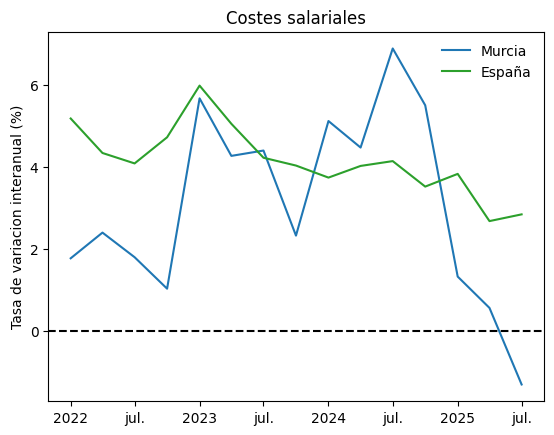

In [55]:
# El grafico de los costes salariales tasa de variacion interanual
fig, ax = plt.subplots()
ax.plot(COS['ti_CST_Mur'], c = '#1f77b4', label = 'Murcia')
ax.plot(COS['ti_CST_Esp'], c = '#2ca02c', label = 'España')
ax.axhline(y = 0, c = 'k', ls = '--')
ax.xaxis.set_major_locator(locator) 
ax.xaxis.set_major_formatter(formatter)  
ax.legend(frameon=False)

plt.ylabel('Tasa de variacion interanual (%)')
plt.title('Costes salariales')
plt.show()

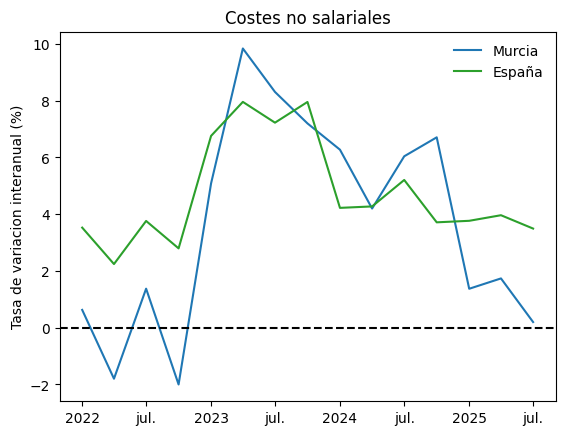

In [56]:
# El grafico de los costes no salariales tasa de variacion interanual
fig, ax = plt.subplots()
ax.plot(COS['ti_OtC_Mur'], c = '#1f77b4', label = 'Murcia')
ax.plot(COS['ti_OtC_Esp'], c = '#2ca02c', label = 'España')
ax.axhline(y = 0, c = 'k', ls = '--')
ax.xaxis.set_major_locator(locator) 
ax.xaxis.set_major_formatter(formatter)  
ax.legend(frameon=False)

plt.ylabel('Tasa de variacion interanual (%)')
plt.title('Costes no salariales')
plt.show()

### Pagina 5

In [57]:
# Parametros del grafico
gridsize = (100,100)
fig_size = (8.27,11.69)
fig = plt.figure(figsize=fig_size, dpi=100)

# Parametros del titulo
header_ax = plt.subplot2grid(gridsize, (0,0), colspan=100, rowspan=25)
header_ax.axis('off')

# El titulo
fig.text(
    0.12, 0.52,
    'Precios y costes:',
    fontsize=18,
    fontweight='bold',
    va='top'
)

# ===== GRAFICOS =====
# Afiliación a la Seguridad Social
ax1 = plt.subplot2grid(gridsize,(0,0),colspan=95,rowspan=30)
ax1.plot(AF['2022':].ti_Mur, c = '#1f77b4', label = 'Murcia')
ax1.plot(AF['2022':].ti_Esp, c = '#2ca02c', label = 'España')
ax1.xaxis.set_major_locator(locator) 
ax1.xaxis.set_major_formatter(formatter)  
ax1.legend(frameon=False)
ax1.set_ylabel('Tasa de variación interanual(%)')
ax1.set_title('Afiliación a la Seguridad Social')

# Decripcion de afiliados
fig.text(
    0.12, 0.58,
    'En noviembre, los afiliados a la Seguridad Social en Murcia crecen alrededor de\nun 3,0% interanual, '
    'ligeramente por encima del 2,4% registrado en el conjunto\nde España, lo que refleja un mercado laboral relativamente dinámico.',
    fontsize=11, va='top'
)

# Evolucion de IPC
ax2 = plt.subplot2grid(gridsize,(57,0),colspan=40,rowspan=30)
ax2.plot(IPC['IPC_Mur_ss_a']['2022':], c = '#1f77b4', label = 'Murcia')
ax2.plot(IPC['IPC_Esp_ss_a']['2022':], c = '#2ca02c', label = 'España')
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(formatter)
ax2.set_ylabel('Tasa de variación interanual (%)')
ax2.set_title('Evolucion de IPC')

# Evolucion de IPC subyacente
ax3 = plt.subplot2grid(gridsize,(57,50),colspan=40,rowspan=30)
ax3.plot(IPC['IPC_s_Mur_ss_a']['2022':], c = '#1f77b4', label = 'Murcia')
ax3.plot(IPC['IPC_s_Esp_ss_a']['2022':], c = '#2ca02c', label = 'España')
ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(formatter)
ax3.set_ylabel('Tasa de variación interanual (%)')
ax3.set_title('Evolucion de IPC subyacente')

# Descripcion de IPC y IPC subyacente
fig.text(
    0.12, 0.14,
    'En noviembre de 2025, la inflación general en Murcia se sitúa en torno al\n2,5% interanual '
    'y la subyacente en el 2,1%, lo que confirma la normalización\ngradual de las presiones de precios.',
    fontsize=11, va='top'
)

for ax in (ax1, ax2, ax3):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['left'].set_linewidth(1)

# ===== FUENTES =====
fig.text(0.16, 0.62,
         'Evolucion de IPC\n'
         'Unidades: variación interanual (%).\n'
         'Fuente: INE. Elaboración propia.',
         ha='left', va='top', fontsize=8)

fig.text(0.12, 0.185,
         'Evolucion de IPC.\n'
         'Unidades: variación interanual (%).\n'
         'Fuente: INE. Elaboración propia.',
         ha='left', va='top', fontsize=8)

fig.text(0.51, 0.185,
         'Evolucion de IPC subyacente\n'
         'Unidades: variación interanual (%).\n'
         'Fuente: INE. Elaboración propia.',
         ha='left', va='top', fontsize=8)

pdf.savefig(fig, bbox_inches="tight", pad_inches=0.05)
plt.close(fig) 
# plt.show()

## 6. Previsiones: (media página)

Previsión propia de la tasa de crecimiento del PIB para el cuarto trimestre de 2025 usando el modelo SARIMAX.  
Previsión propia de la tasa de paro para el cuarto trimestre de 2025 usando el modelo SARIMAX.  
En ambos casos, como variable exógena podéis usar una variable concreta o un indicador compuesto de varias variables. Observad que podéis usar los datos de afiliaciones, contratos y paro registrado, consumo eléctrico, IPI, etc., de los meses de octubre y noviembre para realizar las predicciones. En la nota al pie del gráfico, explicar brevemente la metodología (la técnica usada y qué variable exógena).  
Además, en base a la predicción del punto 6.1, comentad cuál se espera que sea el crecimiento del PIB anual en 2025 (como suma de los cuatro trimestres).  

### Prediccion PIB Espana con SARIMAX

#### Test

In [58]:
# Merge PIB y IPI
pr1 = PIB.merge(AF.dropna(), left_index = True, right_index = True, how ='left')
pr1 = pr1[['ti_Esp','ss_a_Esp']].dropna()
pr1.head()

,ti_Esp,ss_a_Esp
periodo,,
2013-01-01,-4.489500,-2.510075
2013-04-01,-3.941574,-1.656822
2013-07-01,-3.499921,-1.265474
2013-10-01,-2.221020,-0.250638
2014-01-01,0.110950,0.402451


In [59]:
# Dividimos entre train y test datasets
train_sarimax1 = pr1.loc['2013' : '2023']
test_sarimax1 = pr1.loc['2024':'2025-07-01']

# Autoar
autoar = pr1.copy()
autoar['unique_id'] = 'main'
autoar['ds'] = autoar.index
autoar = autoar.rename(columns={"periodo": "ds", "ss_a_Esp": "y"}) 

# Dividimos autoar entre autoar_train y autoar_test
autoar_train = autoar.loc[train_sarimax1.index]
autoar_test = autoar.loc[test_sarimax1.index]
autoar_test

,ti_Esp,y,unique_id,ds
periodo,,,,
2024-01-01,2.591897,2.863020,main,2024-01-01
2024-04-01,1.955699,3.659067,main,2024-04-01
2024-07-01,2.342011,3.633628,main,2024-07-01
2024-10-01,2.112486,3.659682,main,2024-10-01
2025-01-01,2.276617,3.137533,main,2025-01-01
2025-04-01,2.235191,2.967286,main,2025-04-01
2025-07-01,2.273838,2.831458,main,2025-07-01


In [60]:
# Creamos el modelo
modelo = StatsForecast(models=[AutoARIMA(season_length=4,
                                         max_p=1, max_d=1, max_q=1, max_P=1, max_D=1, max_Q=1,    
                                          )],freq='Q')
modelo.fit(autoar_train)

print ("Modelo: (p,q,P,Q,M,d,D): ",modelo.fitted_[0,0].model_['arma'])
print ("Observations",modelo.fitted_[0,0].model_['nobs'])
print ("AIC: ",modelo.fitted_[0,0].model_['aic'])
print ("Coeficientes: ")
for x in modelo.fitted_[0,0].model_['coef']:
  print("  ", x, ":", modelo.fitted_[0,0].model_['coef'][x])

Modelo: (p,q,P,Q,M,d,D):  (1, 1, 1, 0, 4, 0, 0)
Observations 44
AIC:  240.54026677087725
Coeficientes: 
   ar1 : 0.893877444689741
   ma1 : -0.45719942238741945
   sar1 : -0.4570337370255212
   ex_1 : 1.7751677434162376


In [61]:
# Creamos variable X_df
Xt_df = autoar_test.drop('y',axis = 1)

# Predicimos 7 periodos
y_autoarimax = modelo.predict(h=7, X_df = Xt_df, level=[95]) 
y_predict = modelo.predict(h=7, X_df = Xt_df,level=[95])['AutoARIMA']  
y_true = test_sarimax1['ss_a_Esp'].values

forecast_accuracy(np.array(y_predict), np.array(y_true))

{'mape': np.float64(0.09012843043991257), 'corr': np.float64(0.5649301871782878)}


c:\Users\kasza\AppData\Local\Programs\Python\Python313\Lib\site-packages\utilsforecast\processing.py:378: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\kasza\AppData\Local\Programs\Python\Python313\Lib\site-packages\utilsforecast\processing.py:434: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\kasza\AppData\Local\Programs\Python\Python313\Lib\site-packages\utilsforecast\processing.py:378: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\kasza\AppData\Local\Programs\Python\Python313\Lib\site-packages\utilsforecast\processing.py:434: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_o

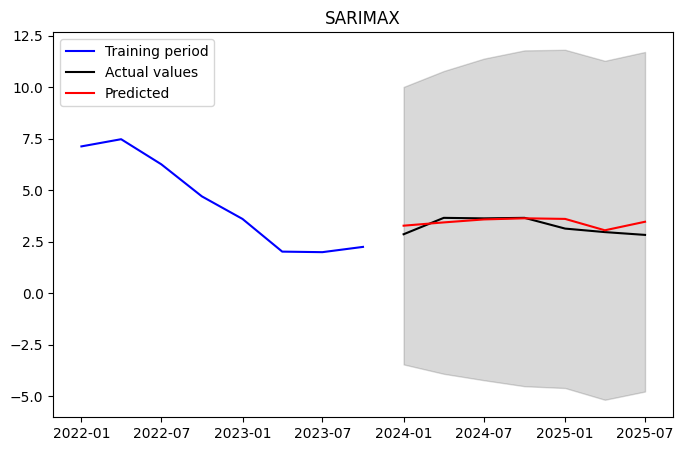

In [62]:
# Prediccion y valores verdaderos
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(train_sarimax1['ss_a_Esp']['2022':], label="Training period", color="b")
ax.plot(test_sarimax1['ss_a_Esp']['2022':], label="Actual values", color="k")
ax.plot(test_sarimax1.index, y_predict.values, label="Predicted", color='r')
ax.fill_between(test_sarimax1.index,
                y_autoarimax["AutoARIMA-lo-95"],
                y_autoarimax["AutoARIMA-hi-95"],
                color='k', alpha=.15)


ax.legend()
ax.set_title("SARIMAX")
plt.show()

#### Prediccion

In [63]:
# Afiliados de 2025-10-01
X_df1 = AF[['ti_Esp']].loc[AF.index == '2025-10-01'].copy()

# Cambiamos el formato
X_df1['unique_id'] = 'main'
X_df1['ds'] = X_df1.index
X_df1


,ti_Esp,unique_id,ds
periodo,,,
2025-10-01,2.680771,main,2025-10-01


In [64]:
# Creamos autoar
autoar = pr1.copy()
autoar['unique_id'] = 'main'
autoar['ds'] = autoar.index
autoar = autoar.rename(columns={"periodo": "ds", "ss_a_Esp": "y"}) 

# Creamos un modelo
modelo.fit(autoar)

print ("Modelo: (p,q,P,Q,M,d,D): ",modelo.fitted_[0,0].model_['arma'])
print ("Observations",modelo.fitted_[0,0].model_['nobs'])
print ("AIC: ",modelo.fitted_[0,0].model_['aic'])
print ("Coeficientes: ")
for x in modelo.fitted_[0,0].model_['coef']:
  print("  ", x, ":", modelo.fitted_[0,0].model_['coef'][x])

Modelo: (p,q,P,Q,M,d,D):  (1, 1, 1, 0, 4, 0, 0)
Observations 51
AIC:  269.60652931125264
Coeficientes: 
   ar1 : 0.8975260064048273
   ma1 : -0.4598604356954195
   sar1 : -0.46294683873604847
   ex_1 : 1.7753433615970977


In [65]:
# Predecimos 1 periodo
y_autoar1 = modelo.predict(h=1, X_df = X_df1, level=[95]) 
y_pr1 = modelo.predict(h=1, X_df = X_df1,level=[95])['AutoARIMA']  
y_pr1.values

c:\Users\kasza\AppData\Local\Programs\Python\Python313\Lib\site-packages\utilsforecast\processing.py:378: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\kasza\AppData\Local\Programs\Python\Python313\Lib\site-packages\utilsforecast\processing.py:434: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\kasza\AppData\Local\Programs\Python\Python313\Lib\site-packages\utilsforecast\processing.py:378: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\kasza\AppData\Local\Programs\Python\Python313\Lib\site-packages\utilsforecast\processing.py:434: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_o

array([3.72475871])

c:\Users\kasza\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\cbook.py:1719: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


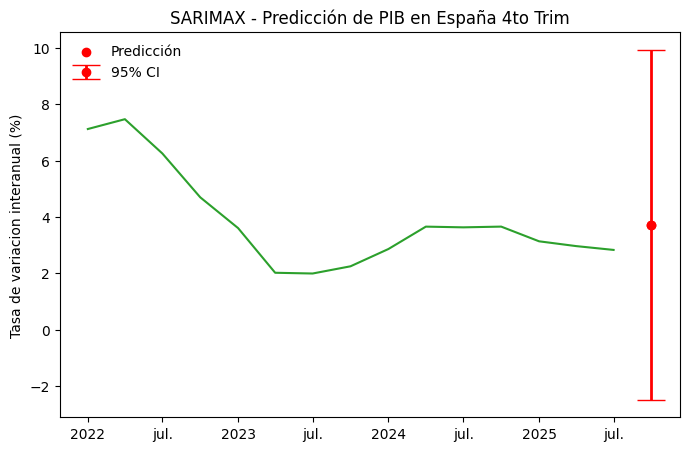

In [66]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(pr1['ss_a_Esp']['2022':],c = '#2ca02c')
ax.scatter(X_df1.index, y_pr1.values, label="Predicción", color='r')
ax.errorbar(
    X_df1.index, 
    y_pr1.values,
    yerr=[y_pr1.values - y_autoar1['AutoARIMA-lo-95'], y_autoar1['AutoARIMA-hi-95'] - y_pr1.values],
    fmt='o', 
    color='r', 
    elinewidth=2, 
    capsize=10, 
    label='95% CI'
)
ax.xaxis.set_major_locator(locator) 
ax.xaxis.set_major_formatter(formatter) 

ax.legend(frameon=False)
ax.set_title("SARIMAX - Predicción de PIB en España 4to Trim")
plt.ylabel('Tasa de variacion interanual (%)')
plt.show()

### Prediccion PIB Murcia con SARIMAX

#### Test

In [67]:
# Merge PIB y IPI
pr2 = PIB.merge(AF.dropna(), left_index = True, right_index = True, how ='left')
pr2 = pr2[['ti_Mur','ss_a_Mur']].dropna()
pr2.head()

,ti_Mur,ss_a_Mur
periodo,,
2013-01-01,-4.337355,-1.451493
2013-04-01,-3.751226,-1.284260
2013-07-01,-3.272009,-0.895032
2013-10-01,-2.304720,-0.761214
2014-01-01,-0.325498,0.332496


In [68]:
# Dividimos entre train y test datasets
train_sarimax2 = pr2.loc['2013' : '2023']
test_sarimax2 = pr2.loc['2024':'2025-07-01']

# Autoar
autoar = pr2.copy()
autoar['unique_id'] = 'main'
autoar['ds'] = autoar.index
autoar = autoar.rename(columns={"periodo": "ds", "ss_a_Mur": "y"}) 

# Dividimos autoar entre autoar_train y autoar_test
autoar_train = autoar.loc[train_sarimax2.index]
autoar_test = autoar.loc[test_sarimax2.index]

In [69]:
# Creamos el modelo
modelo = StatsForecast(models=[AutoARIMA(season_length=4,
                                         max_p=1, max_d=1, max_q=1, max_P=1, max_D=1, max_Q=1,    
                                          )],freq='Q')
modelo.fit(autoar_train)

print ("Modelo: (p,q,P,Q,M,d,D): ",modelo.fitted_[0,0].model_['arma'])
print ("Observations",modelo.fitted_[0,0].model_['nobs'])
print ("AIC: ",modelo.fitted_[0,0].model_['aic'])
print ("Coeficientes: ")
for x in modelo.fitted_[0,0].model_['coef']:
  print("  ", x, ":", modelo.fitted_[0,0].model_['coef'][x])

Modelo: (p,q,P,Q,M,d,D):  (1, 0, 1, 0, 4, 0, 0)
Observations 44
AIC:  211.43631484982814
Coeficientes: 
   ar1 : 0.7692185506345394
   sar1 : -0.5165385123423869
   ex_1 : 0.8235882877702743


In [70]:
# Creamos variable X_df
Xt_df = autoar_test.drop('y',axis = 1)

# Predicimos 7 periodos
y_autoarimax = modelo.predict(h=7, X_df = Xt_df, level=[95]) 
y_predict = modelo.predict(h=7, X_df = Xt_df, level=[95])['AutoARIMA']  
y_true = test_sarimax2['ss_a_Mur'].values

forecast_accuracy(np.array(y_predict), np.array(y_true))

{'mape': np.float64(0.4176386076806856), 'corr': np.float64(-0.0925435196626114)}


c:\Users\kasza\AppData\Local\Programs\Python\Python313\Lib\site-packages\utilsforecast\processing.py:378: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\kasza\AppData\Local\Programs\Python\Python313\Lib\site-packages\utilsforecast\processing.py:434: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\kasza\AppData\Local\Programs\Python\Python313\Lib\site-packages\utilsforecast\processing.py:378: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\kasza\AppData\Local\Programs\Python\Python313\Lib\site-packages\utilsforecast\processing.py:434: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_o

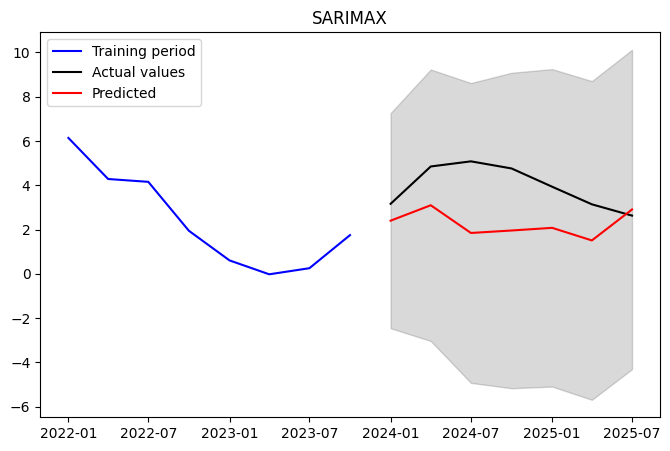

In [71]:
# Prediccion y valores verdaderos
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(train_sarimax2['ss_a_Mur']['2022':], label="Training period", color="b")
ax.plot(test_sarimax2['ss_a_Mur']['2022':], label="Actual values", color="k")
ax.plot(test_sarimax2.index, y_predict.values, label="Predicted", color='r')
ax.fill_between(test_sarimax2.index,
                y_autoarimax["AutoARIMA-lo-95"],
                y_autoarimax["AutoARIMA-hi-95"],
                color='k', alpha=.15)


ax.legend()
ax.set_title("SARIMAX")
plt.show()

#### Prediccion

In [72]:
# Afiliados Octubre 2025
X_df2 = AF[['ti_Mur']].loc[AF.index == '2025-10-01'].copy()

# Cambiamos el formato para autoarima
X_df2['unique_id'] = 'main'
X_df2['ds'] = X_df2.index

# Autoarima
autoar = pr2.copy()
autoar['unique_id'] = 'main'
autoar['ds'] = autoar.index
autoar = autoar.rename(columns={"periodo": "ds", "ss_a_Mur": "y"}) 

# Creamos un modelo
modelo.fit(autoar)

print ("Modelo: (p,q,P,Q,M,d,D): ",modelo.fitted_[0,0].model_['arma'])
print ("Observations",modelo.fitted_[0,0].model_['nobs'])
print ("AIC: ",modelo.fitted_[0,0].model_['aic'])
print ("Coeficientes: ")
for x in modelo.fitted_[0,0].model_['coef']:
  print("  ", x, ":", modelo.fitted_[0,0].model_['coef'][x])

Modelo: (p,q,P,Q,M,d,D):  (1, 0, 1, 0, 4, 0, 0)
Observations 51
AIC:  237.2794526647271
Coeficientes: 
   ar1 : 0.7798931255053586
   sar1 : -0.5221643891954032
   ex_1 : 0.8273818949368626


In [73]:
# Predecimos 1 periodo
y_autoar2 = modelo.predict(h=1, X_df = X_df2, level=[95]) 
y_pr2 = modelo.predict(h=1, X_df = X_df2,level=[95])['AutoARIMA']  
y_pr2.values

c:\Users\kasza\AppData\Local\Programs\Python\Python313\Lib\site-packages\utilsforecast\processing.py:378: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\kasza\AppData\Local\Programs\Python\Python313\Lib\site-packages\utilsforecast\processing.py:434: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\kasza\AppData\Local\Programs\Python\Python313\Lib\site-packages\utilsforecast\processing.py:378: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\kasza\AppData\Local\Programs\Python\Python313\Lib\site-packages\utilsforecast\processing.py:434: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_o

array([2.61094248])

c:\Users\kasza\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\cbook.py:1719: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


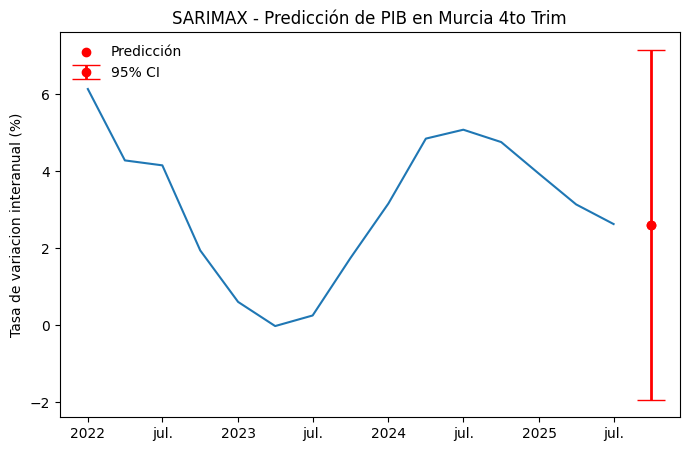

In [74]:
# Grafico de Prediccion
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(pr2['ss_a_Mur']['2022':], color='#1f77b4')
ax.scatter(X_df2.index, y_pr2.values, label="Predicción", color='r')
ax.errorbar(
    X_df2.index, 
    y_pr2.values,
    yerr=[y_pr2.values - y_autoar2['AutoARIMA-lo-95'], y_autoar2['AutoARIMA-hi-95'] - y_pr2.values],
    fmt='o', 
    color='r', 
    elinewidth=2, 
    capsize=10, 
    label='95% CI'
)
ax.xaxis.set_major_locator(locator) 
ax.xaxis.set_major_formatter(formatter) 

ax.legend(frameon=False)
ax.set_title("SARIMAX - Predicción de PIB en Murcia 4to Trim")
plt.ylabel('Tasa de variacion interanual (%)')
plt.show()

### Prediccion Tasa de Paro Espana con SARIMAX

#### Test

In [75]:
# Merge EPA y AF
pr3 = EPA[['TP_Esp']].merge(AF.dropna(), left_index = True, right_index = True, how ='left')
pr3 = pr3[['ti_Esp','TP_Esp']].dropna()

# Dividimos entre train y test datasets
train_sarimax3 = pr3.loc['2016' : '2023']
test_sarimax3 = pr3.loc['2024':'2025-07-01']

# Autoarima
autoar = pr3.copy()
autoar['unique_id'] = 'main'
autoar['ds'] = autoar.index
autoar = autoar.rename(columns={"periodo": "ds", "TP_Esp": "y"}) 

# Dividimos autoar entre autoar_train y autoar_test
autoar_train = autoar.loc[train_sarimax3.index]
autoar_test = autoar.loc[test_sarimax3.index]
autoar_test

,ti_Esp,y,unique_id,ds
periodo,,,,
2024-01-01,2.591897,12.29,main,2024-01-01
2024-04-01,1.955699,11.27,main,2024-04-01
2024-07-01,2.342011,11.21,main,2024-07-01
2024-10-01,2.112486,10.61,main,2024-10-01
2025-01-01,2.276617,11.36,main,2025-01-01
2025-04-01,2.235191,10.29,main,2025-04-01
2025-07-01,2.273838,10.45,main,2025-07-01


In [76]:
# Creamos el modelo
modelo = StatsForecast(models=[AutoARIMA(season_length=4,
                                         max_p=1, max_d=1, max_q=1, max_P=1, max_D=1, max_Q=1,    
                                          )],freq='Q')
modelo.fit(autoar_train)

print ("Modelo: (p,q,P,Q,M,d,D): ",modelo.fitted_[0,0].model_['arma'])
print ("Observations",modelo.fitted_[0,0].model_['nobs'])
print ("AIC: ",modelo.fitted_[0,0].model_['aic'])
print ("Coeficientes: ")
for x in modelo.fitted_[0,0].model_['coef']:
  print("  ", x, ":", modelo.fitted_[0,0].model_['coef'][x])

Modelo: (p,q,P,Q,M,d,D):  (1, 0, 1, 0, 4, 1, 0)
Observations 31
AIC:  64.59603138551783
Coeficientes: 
   ar1 : 0.31769494327706904
   sar1 : 0.5570686830640216
   ex_1 : -0.07402259801029244


In [77]:
# Creamos variable X_df
Xt_df = autoar_test.drop('y',axis = 1)

# Predicimos 7 periodos
y_autoarimax = modelo.predict(h=7, X_df = Xt_df, level=[95]) 
y_predict = modelo.predict(h=7, X_df = Xt_df,level=[95])['AutoARIMA']  
y_true = test_sarimax3['TP_Esp'].values

forecast_accuracy(np.array(y_predict), np.array(y_true))

{'mape': np.float64(0.02507695549153316), 'corr': np.float64(0.9384690966749918)}


c:\Users\kasza\AppData\Local\Programs\Python\Python313\Lib\site-packages\utilsforecast\processing.py:378: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\kasza\AppData\Local\Programs\Python\Python313\Lib\site-packages\utilsforecast\processing.py:434: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\kasza\AppData\Local\Programs\Python\Python313\Lib\site-packages\utilsforecast\processing.py:378: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\kasza\AppData\Local\Programs\Python\Python313\Lib\site-packages\utilsforecast\processing.py:434: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_o

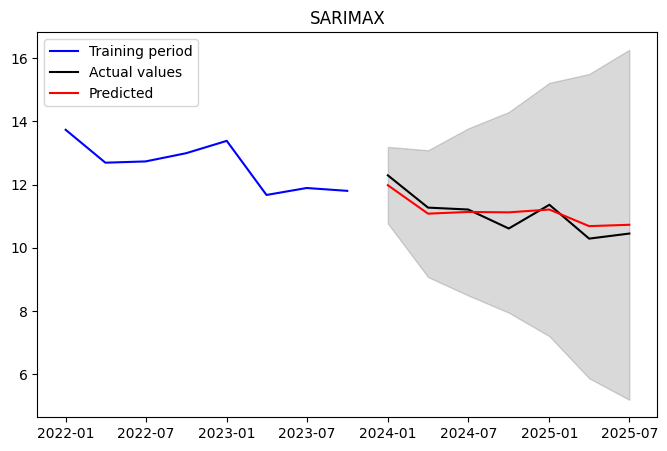

In [78]:
# Prediccion vs valores verdaderos
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(train_sarimax3['TP_Esp']['2022':], label="Training period", color="b")
ax.plot(test_sarimax3['TP_Esp']['2022':], label="Actual values", color="k")
ax.plot(test_sarimax3.index, y_predict.values, label="Predicted", color='r')
ax.fill_between(test_sarimax3.index,
                y_autoarimax["AutoARIMA-lo-95"],
                y_autoarimax["AutoARIMA-hi-95"],
                color='k', alpha=.15)


ax.legend()
ax.set_title("SARIMAX")
plt.show()

#### Prediccion

In [79]:
# Afiliados de 2025-10-01 - X_df1

# Autoarima
autoar = pr3.copy()
autoar['unique_id'] = 'main'
autoar['ds'] = autoar.index
autoar = autoar.rename(columns={"periodo": "ds", "TP_Esp": "y"}) 

# Creamos un modelo
modelo.fit(autoar)

print ("Modelo: (p,q,P,Q,M,d,D): ",modelo.fitted_[0,0].model_['arma'])
print ("Observations",modelo.fitted_[0,0].model_['nobs'])
print ("AIC: ",modelo.fitted_[0,0].model_['aic'])
print ("Coeficientes: ")
for x in modelo.fitted_[0,0].model_['coef']:
  print("  ", x, ":", modelo.fitted_[0,0].model_['coef'][x])

Modelo: (p,q,P,Q,M,d,D):  (1, 0, 1, 0, 4, 1, 0)
Observations 38
AIC:  73.05495318898997
Coeficientes: 
   ar1 : 0.287267894675566
   sar1 : 0.6487720897228305
   ex_1 : -0.075675856979042


In [80]:
# Predecimos 1 periodo
y_autoar3 = modelo.predict(h=1, X_df = X_df1, level=[95]) 
y_pr3 = modelo.predict(h=1, X_df = X_df1,level=[95])['AutoARIMA']  
y_pr3.values

c:\Users\kasza\AppData\Local\Programs\Python\Python313\Lib\site-packages\utilsforecast\processing.py:378: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\kasza\AppData\Local\Programs\Python\Python313\Lib\site-packages\utilsforecast\processing.py:434: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\kasza\AppData\Local\Programs\Python\Python313\Lib\site-packages\utilsforecast\processing.py:378: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\kasza\AppData\Local\Programs\Python\Python313\Lib\site-packages\utilsforecast\processing.py:434: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_o

array([10.07120965])

c:\Users\kasza\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\cbook.py:1719: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


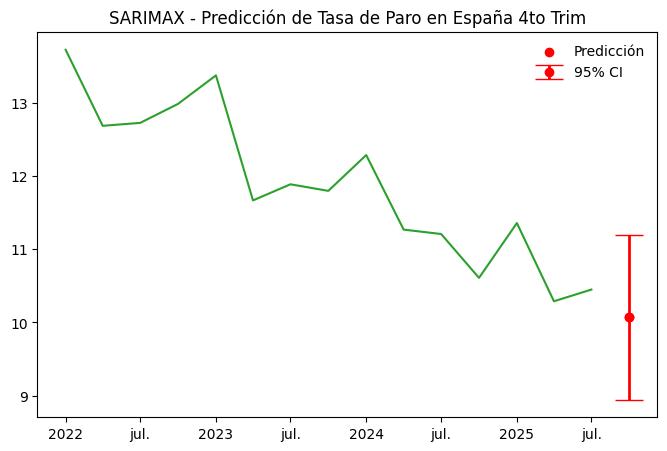

In [81]:
# Grafico de Prediccion
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(pr3['TP_Esp']['2022':], color="#2ca02c")
ax.scatter(X_df1.index, y_pr3.values, label="Predicción", color='r')
ax.errorbar(
    X_df1.index, 
    y_pr3.values,
    yerr=[y_pr3.values - y_autoar3['AutoARIMA-lo-95'], y_autoar3['AutoARIMA-hi-95'] - y_pr3.values],
    fmt='o', 
    color='r', 
    elinewidth=2, 
    capsize=10, 
    label='95% CI'
)

ax.xaxis.set_major_locator(locator) 
ax.xaxis.set_major_formatter(formatter) 

ax.legend(frameon=False)
ax.set_title("SARIMAX - Predicción de Tasa de Paro en España 4to Trim")
plt.show()

### Prediccion Tasa de Paro Murcia con SARIMAX

#### Test

In [82]:
# Merge PIB y IPI
pr4 = EPA[['TP_Mur']].merge(AF.dropna(), left_index = True, right_index = True, how ='left')
pr4 = pr4[['ti_Mur','TP_Mur']].dropna()
pr4.head()

,ti_Mur,TP_Mur
periodo,,
2016-01-01,4.834397,22.104053
2016-04-01,4.841766,18.711700
2016-07-01,5.208498,19.747123
2016-10-01,3.058918,18.575499
2017-01-01,2.848898,19.344355


In [83]:
# Dividimos entre train y test datasets
train_sarimax4 = pr4.loc['2016' : '2023']
test_sarimax4 = pr4.loc['2024':'2025-07-01']

# Autoarima
autoar = pr4.copy()
autoar['unique_id'] = 'main'
autoar['ds'] = autoar.index
autoar = autoar.rename(columns={"periodo": "ds", "TP_Mur": "y"}) 

# Dividimos autoar entre autoar_train y autoar_test
autoar_train = autoar.loc[train_sarimax4.index]
autoar_test = autoar.loc[test_sarimax4.index]

In [84]:
# Creamos el modelo
modelo = StatsForecast(models=[AutoARIMA(season_length=4,
                                         max_p=1, max_d=1, max_q=1, max_P=1, max_D=1, max_Q=1,    
                                          )],freq='Q')
modelo.fit(autoar_train)

print ("Modelo: (p,q,P,Q,M,d,D): ",modelo.fitted_[0,0].model_['arma'])
print ("Observations",modelo.fitted_[0,0].model_['nobs'])
print ("AIC: ",modelo.fitted_[0,0].model_['aic'])
print ("Coeficientes: ")
for x in modelo.fitted_[0,0].model_['coef']:
  print("  ", x, ":", modelo.fitted_[0,0].model_['coef'][x])

Modelo: (p,q,P,Q,M,d,D):  (1, 0, 1, 0, 4, 1, 0)
Observations 31
AIC:  102.32486898457802
Coeficientes: 
   ar1 : -0.2795671142857269
   sar1 : 0.6183570319075917
   ex_1 : -0.2137292671073717


In [85]:
# Creamos variable X_df
Xt_df = autoar_test.drop('y',axis = 1)

# Predicimos 7 periodos
y_autoarimax = modelo.predict(h=7, X_df = Xt_df, level=[95]) 
y_predict = modelo.predict(h=7, X_df = Xt_df, level=[95])['AutoARIMA']  
y_true = test_sarimax4['TP_Mur'].values

forecast_accuracy(np.array(y_predict), np.array(y_true))

{'mape': np.float64(0.11979721183672679), 'corr': np.float64(-0.06962589524554624)}


c:\Users\kasza\AppData\Local\Programs\Python\Python313\Lib\site-packages\utilsforecast\processing.py:378: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\kasza\AppData\Local\Programs\Python\Python313\Lib\site-packages\utilsforecast\processing.py:434: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\kasza\AppData\Local\Programs\Python\Python313\Lib\site-packages\utilsforecast\processing.py:378: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\kasza\AppData\Local\Programs\Python\Python313\Lib\site-packages\utilsforecast\processing.py:434: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_o

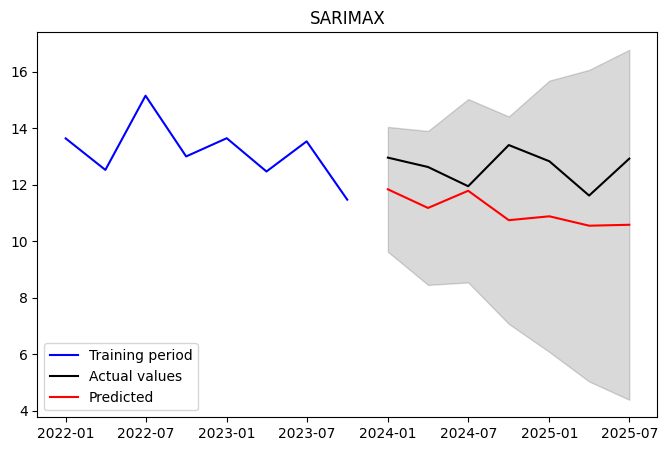

In [86]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(train_sarimax4['TP_Mur']['2022':], label="Training period", color="b")
ax.plot(test_sarimax4['TP_Mur']['2022':], label="Actual values", color="k")
ax.plot(test_sarimax4.index, y_predict.values, label="Predicted", color='r')
ax.fill_between(test_sarimax4.index,
                y_autoarimax["AutoARIMA-lo-95"],
                y_autoarimax["AutoARIMA-hi-95"],
                color='k', alpha=.15)


ax.legend()
ax.set_title("SARIMAX")
plt.show()

#### Prediccion

In [87]:
# Afiliados del Octubre 2025 en el formato de autoarima - X_df2

# Autoarima
autoar = pr4.copy()
autoar['unique_id'] = 'main'
autoar['ds'] = autoar.index
autoar = autoar.rename(columns={"periodo": "ds", "TP_Mur": "y"}) 

# Creamos un modelo
modelo.fit(autoar)

print ("Modelo: (p,q,P,Q,M,d,D): ",modelo.fitted_[0,0].model_['arma'])
print ("Observations",modelo.fitted_[0,0].model_['nobs'])
print ("AIC: ",modelo.fitted_[0,0].model_['aic'])
print ("Coeficientes: ")
for x in modelo.fitted_[0,0].model_['coef']:
  print("  ", x, ":", modelo.fitted_[0,0].model_['coef'][x])

Modelo: (p,q,P,Q,M,d,D):  (1, 0, 0, 0, 1, 1, 0)
Observations 38
AIC:  124.37330131950264
Coeficientes: 
   ar1 : -0.6488605937289991
   drift : -0.20994304890938312
   ex_1 : -0.07459990465480378


In [88]:
# Predecimos 1 periodo
y_autoar4 = modelo.predict(h=1, X_df = X_df2, level=[95]) 
y_pr4 = modelo.predict(h=1, X_df = X_df2,level=[95])['AutoARIMA']  
y_pr4.values

c:\Users\kasza\AppData\Local\Programs\Python\Python313\Lib\site-packages\utilsforecast\processing.py:378: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\kasza\AppData\Local\Programs\Python\Python313\Lib\site-packages\utilsforecast\processing.py:434: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\kasza\AppData\Local\Programs\Python\Python313\Lib\site-packages\utilsforecast\processing.py:378: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\kasza\AppData\Local\Programs\Python\Python313\Lib\site-packages\utilsforecast\processing.py:434: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_o

array([11.66019678])

c:\Users\kasza\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\cbook.py:1719: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


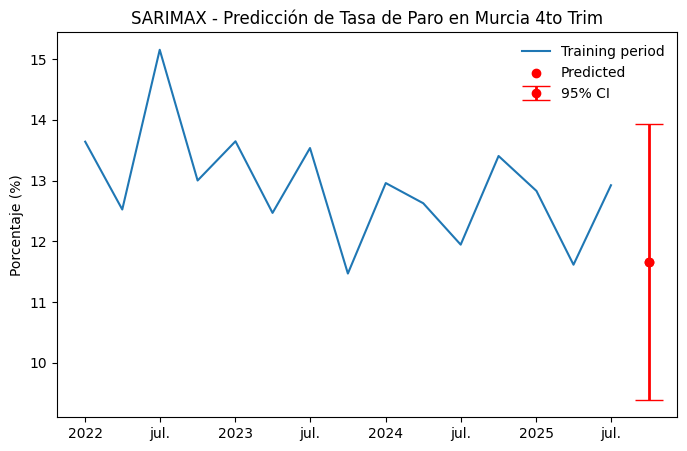

In [89]:
# Prediccion
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(pr4['TP_Mur']['2022':], label="Training period", color='#1f77b4')
ax.scatter(X_df2.index, y_pr4.values, label="Predicted", color='r')
ax.errorbar(
    X_df2.index, 
    y_pr4.values,
    yerr=[y_pr4.values - y_autoar4['AutoARIMA-lo-95'], y_autoar4['AutoARIMA-hi-95'] - y_pr4.values],
    fmt='o', 
    color='r', 
    elinewidth=2, 
    capsize=10, 
    label='95% CI'
)

ax.xaxis.set_major_locator(locator) 
ax.xaxis.set_major_formatter(formatter) 

ax.legend(frameon=False)
ax.set_title("SARIMAX - Predicción de Tasa de Paro en Murcia 4to Trim")
plt.ylabel('Porcentaje (%)')
plt.show()

### Pagina 6

In [90]:
# Parametros del grafico
gridsize = (100,100)
fig_size = (8.27,11.69)
fig = plt.figure(figsize=fig_size, dpi=100)

# Parametros del titulo
header_ax = plt.subplot2grid(gridsize, (0,0), colspan=100, rowspan=25)
header_ax.axis('off')

# EL titulo
fig.text(
    0.12, 0.52,
    'Previsiones:',
    fontsize=18,
    fontweight='bold',
    va='top'
)

# ===== GRAFICOS =====
# Afiliación a la Seguridad Social
ax1 = plt.subplot2grid(gridsize,(0,0),colspan=40,rowspan=30)
ax1.plot(COS['ti_CST_Mur'], c = '#1f77b4', label = 'Murcia')
ax1.plot(COS['ti_CST_Esp'], c = '#2ca02c', label = 'España')
ax1.xaxis.set_major_locator(locator) 
ax1.xaxis.set_major_formatter(formatter)
ax1.axhline(y = 0, c = 'k', ls = '--')
ax1.legend(frameon=False)
ax1.set_ylabel('Tasa de variación interanual(%)')
ax1.set_title('Costes salariales')

# Evolucion de IPC
ax2 = plt.subplot2grid(gridsize,(0,50),colspan=40,rowspan=30)
ax2.plot(COS['ti_OtC_Mur'], c = '#1f77b4', label = 'Murcia')
ax2.plot(COS['ti_OtC_Esp'], c = '#2ca02c', label = 'España')
ax2.axhline(y = 0, c = 'k', ls = '--')
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(formatter)
ax2.set_ylabel('Tasa de variación interanual (%)')
ax2.set_title('Costes no salariales')

# === SARIMAX PIB ===
ax3 = plt.subplot2grid(gridsize, (57,0), colspan=40, rowspan=30)
ax3.plot(pr1['ss_a_Esp']['2022':], c='#2ca02c')
ax3.plot(pr2['ss_a_Mur']['2022':], c='#1f77b4')

# Predicciónes
ax3.scatter(X_df1.index, y_pr1.values, color='#2ca02c', s=80, marker='^', 
            edgecolor='black', linewidth=1, zorder=5, label='Pred. España')
ax3.scatter(X_df2.index, y_pr2.values, color='#1f77b4', s=80, marker='o', 
            edgecolor='black', linewidth=1, zorder=5, label='Pred. Murcia')

# CI España
ax3.errorbar(X_df1.index, y_pr1.values,
             yerr=[y_pr1.values - y_autoar1['AutoARIMA-lo-95'], 
                   y_autoar1['AutoARIMA-hi-95'] - y_pr1.values],
             fmt='none', color='#2ca02c', elinewidth=3, capsize=8, capthick=2, 
             alpha=0.7)

# CI Murcia
ax3.errorbar(X_df2.index, y_pr2.values,
             yerr=[y_pr2.values - y_autoar2['AutoARIMA-lo-95'], 
                   y_autoar2['AutoARIMA-hi-95'] - y_pr2.values],
             fmt='none', color='#1f77b4', elinewidth=3, capsize=8, capthick=2, 
             alpha=0.8, linestyle='--')

ax3.xaxis.set_major_locator(locator)
ax3.xaxis.set_major_formatter(formatter)
ax3.set_ylabel('Tasa de variación interanual (%)')
ax3.set_title('Predicción PIB\nEspaña y Murcia 4T25')

# === SARIMAX TASA DE PARO ===
ax4 = plt.subplot2grid(gridsize, (57,50), colspan=40, rowspan=30) 
ax4.plot(pr3['TP_Esp']['2022':], c='#2ca02c')
ax4.plot(pr4['TP_Mur']['2022':], c='#1f77b4')

# Predicciónes
ax4.scatter(X_df1.index, y_pr3.values, color='#2ca02c', s=80, marker='^', 
            edgecolor='black', linewidth=1, zorder=5, label='Pred. España')
ax4.scatter(X_df2.index, y_pr4.values, color='#1f77b4', s=80, marker='o', 
            edgecolor='black', linewidth=1, zorder=5, label='Pred. Murcia')

# CI España
ax4.errorbar(X_df1.index, y_pr3.values,
             yerr=[y_pr3.values - y_autoar3['AutoARIMA-lo-95'], 
                   y_autoar3['AutoARIMA-hi-95'] - y_pr3.values],
             fmt='none', color='#2ca02c', elinewidth=3, capsize=8, capthick=2, 
             alpha=0.7, label='España 95% CI')

# CI Murcia
ax4.errorbar(X_df2.index, y_pr4.values,
             yerr=[y_pr4.values - y_autoar4['AutoARIMA-lo-95'], 
                   y_autoar4['AutoARIMA-hi-95'] - y_pr4.values],
             fmt='none', color='#1f77b4', elinewidth=3, capsize=8, capthick=2, 
             alpha=0.8, linestyle='--', label='Murcia 95% CI')

ax4.xaxis.set_major_locator(locator)
ax4.xaxis.set_major_formatter(formatter)
ax4.set_ylabel('Tasa de variación interanual (%)')
ax4.set_title('Predicción Tasa de Paro\nEspaña y Murcia 4T25')

# === Leyenda ===
handles3, labels3 = ax3.get_legend_handles_labels()
handles4, labels4 = ax4.get_legend_handles_labels()

handles = handles3 + handles4
labels  = labels3  + labels4
uniq = dict(zip(labels, handles)) 
labels_uniq  = list(uniq.keys())
handles_uniq = list(uniq.values())

fig.legend(handles_uniq, labels_uniq,
           loc='upper center',
           bbox_to_anchor=(0.66, 0.19),
           ncol=2, fontsize=9, frameon=False)

for ax in (ax1, ax2, ax3, ax4):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['left'].set_linewidth(1)

# ===== DESCRIPCIONES =====
fig.text(
    0.12, 0.58,
    'En el 3T25, los costes salariales en Murcia caen un 1,3% interanual, frente\n'
    'al +2,8% de España, mientras los no salariales apenas crecen un 0,2% en\n'
    'Murcia (vs +3,5% nacional), mostrando una contención notable.',
    fontsize=11, va='top'
)

fig.text(
    0.12, 0.14,
    'Para el 4T de 2025, se prevé que el PIB crezca en torno al 3,7% interanual en España\n'
    'y al 2,6% en la Región de Murcia, con intervalos de confianza relativamente amplios\n'
    'que reflejan la elevada incertidumbre del entorno macroeconómico.',
    fontsize=11, va='top'
)

fig.text(
    0.12, 0.08,
    'Al mismo tiempo, la tasa de paro se situaría en torno al 10,1% en España\n'
    'y al 11,7% en Murcia, con bandas de predicción que recogen posibles\n'
    'desviaciones menores que en el caso anterior.',
    fontsize=11, va='top'
)

# ===== FUENTES =====
fig.text(0.12, 0.62,
         'Costes salariales\n'
         'Unidades: variación interanual (%).\n'
         'Fuente: INE. Elaboración propia.',
         ha='left', va='top', fontsize=8)

fig.text(0.51, 0.62,
         'Costes no salariales.\n'
         'Unidades: variación interanual (%).\n'
         'Fuente: INE. Elaboración propia.',
         ha='left', va='top', fontsize=8)

fig.text(0.12, 0.18,
         'PIB y Tasa de Paro.\n'
         'Unidades: variación interanual (%).\n'
         'Fuente: INE. Elaboración propia.',
         ha='left', va='top', fontsize=8)

pdf.savefig(fig, bbox_inches="tight", pad_inches=0.05)
plt.close(fig) 
plt.show()

## 7. Cuadro de indicadores:
Tabla de indicadores donde se muestren los valores de los principales indicadores durante los últimos periodos.  
La tabla debe incluir al menos todas las variables e indicadores mostrados en el informe.

### Tablas

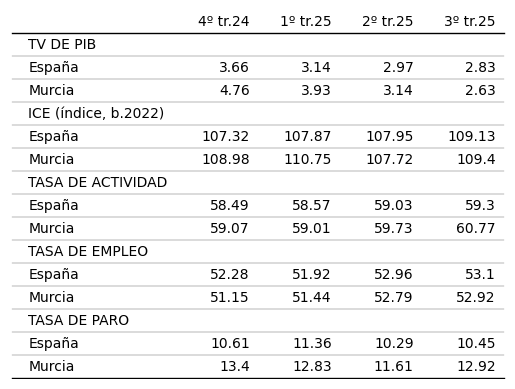

In [91]:
# Creamos df con valores para tabla nr1
### Que tengo que incluir: PIB, TP, TA, TE ,ICE
df_tab1 = pd.concat([PIB[['ss_a_Esp','ss_a_Mur']], EPA[['TA_Esp','TA_Mur','TE_Esp','TE_Mur','TP_Esp','TP_Mur']], ICE[['ICE_Esp_22','ICE_Mur_22']][:'2025-07']], axis=1)
df_tab1 = df_tab1.round(2)
df_tab1.tail(4)


# === Tabla (trimestres) ===
# 1. Creamos una copia con los periodos deseados
df_tab1=df_tab1.iloc[-4:].copy()

# 2. Creamos columnas con el nombre de las variables a representar.
df_tab1["TV DE PIB"]=""
df_tab1["ICE (índice, b.2022)"]=""
df_tab1["TASA DE ACTIVIDAD"]=""
df_tab1["TASA DE EMPLEO"]=""
df_tab1["TASA DE PARO"]=""

# 3. Ordenamos las columnas:
df_tab1=df_tab1[["TV DE PIB",'ss_a_Esp','ss_a_Mur',
      "ICE (índice, b.2022)",'ICE_Esp_22','ICE_Mur_22',
      "TASA DE ACTIVIDAD",'TA_Esp','TA_Mur',
      "TASA DE EMPLEO",'TE_Esp','TE_Mur',
      "TASA DE PARO",'TP_Esp','TP_Mur',
      ]]

# 4. Transponemos la tabla
df_tab1=df_tab1.T

nuevo_index = [
    "TV DE PIB",
    "España",
    "Murcia",
    "ICE (índice, b.2022)",
    "España",
    "Murcia",
    "TASA DE ACTIVIDAD",
    "España",
    "Murcia",
    "TASA DE EMPLEO",
    "España",
    "Murcia",
    "TASA DE PARO",
    "España",
    "Murcia",
]

df_tab1.index = nuevo_index

# 5. Renombramos las columnas
df_tab1.columns=["4º tr.24","1º tr.25","2º tr.25","3º tr.25"]
df_tab1.index.name = " " 

# Vemos como queda
Table(df_tab1,
      column_definitions=[ColumnDefinition(name=" ", width=2, textprops={"ha": "left"})],
      footer_divider=True )

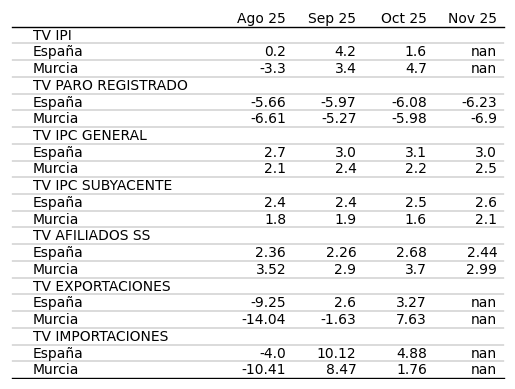

In [92]:
# Creamos df con valores para tabla nr2
### Que tengo que incluir: IPI, PR, IPC general y subyacente, EX, IM, AF
df_tab2 = pd.concat([IPI[['IPI_Esp_ss_a','IPI_Mur_ss_a']],PR[['ti_PR_Esp','ti_PR_Mur']],\
    IPC[['IPC_Esp_ss_a','IPC_Mur_ss_a','IPC_s_Esp_ss_a','IPC_s_Mur_ss_a']], AF[['ti_Esp','ti_Mur']],\
    EX[['ex_ss_Esp','ex_ss_Mur']],IM[['im_ss_Esp','im_ss_Mur']]], axis=1)
df_tab2 = df_tab2.round(2)

# === Tabla (mensuales) ===
# 1. Creamos una copia con los periodos deseados
df_tab2=df_tab2.iloc[-4:].copy()

# 2. Creamos columnas con el nombre de las variables a representar.
df_tab2["TV IPI"] = ""
df_tab2["TV PARO REGISTRADO"] = ""
df_tab2["TV IPC GENERAL"] = ""
df_tab2["TV IPC SUBYACENTE"] = ""
df_tab2["TV AFILIADOS"] = ""
df_tab2["TV EXPORTACIONES"] = ""
df_tab2["TV IMPORTACIONES"] = ""

# 2. EL orden de las columnas
df_tab2 = df_tab2[
    ["TV IPI", "IPI_Esp_ss_a", "IPI_Mur_ss_a",
     "TV PARO REGISTRADO", "ti_PR_Esp", "ti_PR_Mur",
     "TV IPC GENERAL", "IPC_Esp_ss_a", "IPC_Mur_ss_a",
     "TV IPC SUBYACENTE", "IPC_s_Esp_ss_a", "IPC_s_Mur_ss_a",
     "TV AFILIADOS", "ti_Esp", "ti_Mur",
     "TV EXPORTACIONES", "ex_ss_Esp", "ex_ss_Mur",
     "TV IMPORTACIONES", "im_ss_Esp", "im_ss_Mur"]
]

# 3. Transposicion
df_tab2 = df_tab2.T

# 4. Nombres de las columnas
df_tab2.columns = ["Ago 25", "Sep 25", "Oct 25", "Nov 25"]

# 5. Nombres de las filas
df_tab2.index = [
    "TV IPI", "España", "Murcia",
    "TV PARO REGISTRADO", "España", "Murcia",
    "TV IPC GENERAL", "España", "Murcia",
    "TV IPC SUBYACENTE", "España", "Murcia",
    "TV AFILIADOS SS", "España", "Murcia",
    "TV EXPORTACIONES", "España", "Murcia",
    "TV IMPORTACIONES", "España", "Murcia",
]

df_tab2.index.name = " "

Table(
    df_tab2,
    column_definitions=[
        ColumnDefinition(name=" ", width=3, textprops={"ha": "left"})
    ],
    footer_divider=True
)

### Pagina 7

In [93]:
# Parametros del grafico
gridsize = (100, 100)
fig_size = (8.27, 11.69)
fig = plt.figure(figsize=fig_size, dpi=100)

# Parametros del titulo principal
header_ax = plt.subplot2grid(gridsize, (0, 0), colspan=100, rowspan=8)
header_ax.axis('off')

# EL titulo principal
fig.text(
    0.17, 0.88,
    'Cuadro de indicadores:',      
    fontsize=18,
    fontweight='bold',
    va='top'
)

# ===== TABLA 1 (TRIMESTRAL) =====
ax_tab1 = plt.subplot2grid(gridsize, (5, 5), colspan=90, rowspan=35)
ax_tab1.axis('off')

Table(
    df_tab1,
    ax=ax_tab1,
    column_definitions=[
        ColumnDefinition(name=" ", width=3, textprops={"ha": "left"})
    ],
    footer_divider=True
)

# ===== TABLA 2 (MENSUAL) =====
ax_tab2 = plt.subplot2grid(gridsize, (42, 5), colspan=90, rowspan=45)
ax_tab2.axis('off')

Table(
    df_tab2,
    ax=ax_tab2,
    column_definitions=[
        ColumnDefinition(name=" ", width=3, textprops={"ha": "left"})
    ],
    footer_divider=True
)

# Nota fuentes debajo
fig.text(
    0.17, 0.20,
    'TV: tasas de variación interanual (%). Índices base 2022=100 cuando procede.\n'
    'Fuente: INE, Datacomex. Elaboración propia.',
    fontsize=8,
    va='top'
)

pdf.savefig(fig, bbox_inches="tight", pad_inches=0.05)
plt.close(fig) 
plt.show()


In [94]:
pdf.close()